**Estas notas son tomadas del [Curso de Manipulación y Análisis de Datos con Pandas y Python](https://platzi.com/cursos/pandas/) de Platzi.** 


# Comenzando con Pandas

## ¿Qué es Pandas?

* Es una librería enfocada al análisis de datos.
* Es la librería más usada por Data Scientist.
* Se la usa en analítica, estadística, economía y análisis de lenguaje.
* Pandas viene de **PANel DAta**.
* Fue inventada en 2008 por Wes McKinney para analizar grandes volúmnenes de datos financieros.

### Ventajas y desventajas de pandas.
* Reduce líneas de código.
* Diseñada especialmente para el análisis.
* API fácil y concisa.
* Múltiples funciones.
****
* Incompatibilidad con matrices 3D.
* Curva de aprendizaje lenta.

_no para estructuras mas complejas, matrices de mas de 3 dimensiones por ejemplo, en ese caso se recomienda numpy o numba_

## Primeros pasos con Google Colab

Configurar entorno de trabajo

## Series e indexación y selección de datos

* Con Pandas podemos definir series, que son una especie de vectores pero con una columna de indexación. (se parecen a los arrays de numpy).
* Por ejemplo:


In [3]:
import pandas as pd
#cuenta con una columna de indexación
# se definen dentro de paréntesis
sr = pd.Series([1, 4, 2, 7, 5])
sr

0    1
1    4
2    2
3    7
4    5
dtype: int64

* Puedes obtener los valores con `sr.values` o los índices con `sr.index.`
* A las series les puedes poner otro tipo de indexación, letras, por ejemplo.

In [4]:
#sr.values devuelve los valores--> objeto tipo numpy, es un vector
sr.values

array([1, 4, 2, 7, 5], dtype=int64)

* ```sr.index``` te devuelve un rango

In [5]:
sr.index

RangeIndex(start=0, stop=5, step=1)

In [8]:
#dimensionalidad del objeto
sr.shape

(5,)

* **no olvidar el DOBLE CORCHETE CUADRADO**

In [9]:
#indicando el índice
sr[[3]]

3    7
dtype: int64

In [ ]:
sr[[0,4,2]] # respeta el orden en que lo filtro

In [10]:
#Definiendo nuevos índices
#el valor index, es una lista
sr = pd.Series([1, 4, 2, 7, 6], index=['a', 'b', 'c', 'd', 'e'])
sr

a    1
b    4
c    2
d    7
e    6
dtype: int64

* Vamos a acceder a un valor a través de sus índices:

In [ ]:
sr[['c']]

c    2
dtype: int64

In [11]:
sr[['e','c','a']]

e    6
c    2
a    1
dtype: int64

In [ ]:
#podemos usar slices, incluidos ambos extremos, usando sólo un corchete cuadrado
sr['b':'d']

b    4
c    2
d    7
dtype: int64

* Ahora veamos series con diccionarios:

In [12]:
myDict = {'CO':57, 'ECU':593, 'USA':1, 'UY':598, 'MX':200}

In [ ]:
myDict # un diccionario normal los muestra por orden alfabético

{'CO': 57, 'ECU': 593, 'MX': 200, 'USA': 1, 'UY': 598}

In [13]:
myDict.keys()

dict_keys(['CO', 'ECU', 'USA', 'UY', 'MX'])

In [14]:
type(myDict.keys())

dict_keys

In [15]:
#Para convertir diccionario en serie:
#los key serán los índices y los values los valores dew la columna
pd.Series(myDict)

CO      57
ECU    593
USA      1
UY     598
MX     200
dtype: int64

* Cuando agregamos un índice nuevo que no tiene valor asociado se pone por defecto NaN (nulo).
* Cualquier operación que se haga con una variable nula el resultado siempre será NaN. `NaN + 10 = NaN`.
* NaN también viene en Numpy.

In [16]:
sr1=pd.Series(myDict, index=['CO', 'ECU', 'USA', 'BR'])

In [19]:
sr1

CO      57.0
ECU    593.0
USA      1.0
BR       NaN
dtype: float64

In [17]:
import numpy as np

In [18]:
np.nan +10

nan

`.isnull()`al aplicarlo sobre la serie mostrará True en los elementos nulos

`.notnull()`, True para aquellos no nulos

In [ ]:
sr1.isnull()

CO     False
ECU    False
USA    False
BR      True
dtype: bool

In [ ]:
type(sr1.notnull())

pandas.core.series.Series

## De paneles de datos al DataFrame

* Un Data Frame es una estructura bidimensional de datos que tiene filas y columnas.
* Es parecido a un spreadsheet de Excel.
* Cada columna tiene sus nombres y cada fila un index que lo puedes personalizar.

In [1]:
import pandas as pd
import numpy as np

dict_data = {'CO':300, 'MX':400, 'CH':200}

#Lo hacemos serie
pd.Series(dict_data)

CO    300
MX    400
CH    200
dtype: int64

In [2]:
#Ahora hagamos un Data Frame, que es más complejo que una serie
dict_data = {'CH': [100, 800, 200], 'CO': [100, 200, 300], 'MX': [300, 500, 400]}
pd.DataFrame(dict_data)

,CH,CO,MX
0,100,100,300
1,800,200,500
2,200,300,400


### Analizando datos de un Data Frame

* Veamos qué operaciones podemos hacer para extraer datos.

In [20]:
dict_data = {
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'M', 'F', 'F', 'M', 'M', 'M', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}

dict_data

{'edad': [10, 9, 13, 14, 12, 11, 12],
 'cm': [115, 110, 130, 155, 125, 120, 125],
 'pais': ['co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
 'genero': ['M', 'F', 'F', 'M', 'M', 'M', 'F'],
 'Q1': [5, 10, 8, nan, 7, 8, 3],
 'Q2': [7, 9, 9, 8, 8, 8, 9.0]}

A diferencia del diccionario al hacer una serie, al convertir un dicionario a una dataframe, los keys serán los titulos de las columnas, y los values (en formato lista) serán los valores de dicha columna

In [24]:
df=pd.DataFrame(dict_data)
df

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7.0
1,9,110,mx,F,10.0,9.0
2,13,130,co,F,8.0,9.0
3,14,155,mx,M,NaN,8.0
4,12,125,mx,M,7.0,8.0
5,11,120,ch,M,8.0,8.0
6,12,125,ch,F,3.0,9.0


In [27]:
df = pd.DataFrame(dict_data, index=['ana','benito','camilo','daniel','erika','fabian','gabriela'])
df

,edad,cm,pais,genero,Q1,Q2
ana,10,115,co,M,5.0,7.0
benito,9,110,mx,F,10.0,9.0
camilo,13,130,co,F,8.0,9.0
daniel,14,155,mx,M,NaN,8.0
erika,12,125,mx,M,7.0,8.0
fabian,11,120,ch,M,8.0,8.0
gabriela,12,125,ch,F,3.0,9.0


In [25]:
df.describe() # datos estadísticos de las variables cuantitativas

,edad,cm,Q1,Q2
count,7.000000,7.000000,6.000000,7.000000
mean,11.571429,125.714286,6.833333,8.285714
std,1.718249,14.556949,2.483277,0.755929
min,9.000000,110.000000,3.000000,7.000000
25%,10.500000,117.500000,5.500000,8.000000
50%,12.000000,125.000000,7.500000,8.000000
75%,12.500000,127.500000,8.000000,9.000000
max,14.000000,155.000000,10.000000,9.000000


*  `df.index` devuelve un rango si el índice es numérico, los nombres de los índicessi el indice es personalizado
* `df.columns` devuelve nombres de las columnas.
* Los valores con `df.values`.

In [26]:
df.index

RangeIndex(start=0, stop=7, step=1)

In [6]:
df.columns

Index(['edad', 'cm', 'pais', 'genero', 'Q1', 'Q2'], dtype='object')

In [ ]:
df.values

array([[10, 115, 'co', 'M', 5.0, 7.0],
       [9, 110, 'mx', 'F', 10.0, 9.0],
       [13, 130, 'co', 'F', 8.0, 9.0],
       [14, 155, 'mx', 'M', nan, 8.0],
       [12, 125, 'mx', 'M', 7.0, 8.0],
       [11, 120, 'ch', 'M', 8.0, 8.0],
       [12, 125, 'ch', 'F', 3.0, 9.0]], dtype=object)

* También puedes acceder a los valores de una columna en específico.
* al usar solo un corchete obtenemos un objeto tipo serie

In [7]:
df['edad']

ana         10
benito       9
camilo      13
daniel      14
erika       12
fabian      11
gabriela    12
Name: edad, dtype: int64

* Al usar doble corchete s obtiene un Data Frame.
* Para el caso anterior sería `df[['edad']]`

In [28]:
df[['edad']]

,edad
ana,10
benito,9
camilo,13
daniel,14
erika,12
fabian,11
gabriela,12


In [11]:
df[['edad','cm','Q1']]

,edad,cm,Q1
ana,10,115,5.0
benito,9,110,10.0
camilo,13,130,8.0
daniel,14,155,NaN
erika,12,125,7.0
fabian,11,120,8.0
gabriela,12,125,3.0


* También puedes acceder a datos puntuales.
* Puedes acceder con el índice y nombre de la columna usando el método `loc`.
* Puedes acceder con las posiciones del índice y columna con el método `iloc`.

In [29]:
# [[filas]],[[columnas]]
df.loc[['ana', 'gabriela'], ['edad', 'cm', 'Q1']]

,edad,cm,Q1
ana,10,115,5.0
gabriela,12,125,3.0


In [37]:
type(df.iloc[[0, 6], [0, 1, 4]])

pandas.core.frame.DataFrame

In [13]:
df.iloc[[0, 6], [0, 1, 4]]

,edad,cm,Q1
ana,10,115,5.0
gabriela,12,125,3.0


In [33]:
#toda la columna entera
df.iloc[:,[1,3]]

,cm,genero
ana,115,M
benito,110,F
camilo,130,F
daniel,155,M
erika,125,M
fabian,120,M
gabriela,125,F


* Tambíen puedes aplicar condicionales para hacer consultas.
* Puedes usar el método `query` que es el más prolijo o el método 'manual'.

In [34]:
df[df['edad']>=12]

,edad,cm,pais,genero,Q1,Q2
camilo,13,130,co,F,8.0,9.0
daniel,14,155,mx,M,NaN,8.0
erika,12,125,mx,M,7.0,8.0
gabriela,12,125,ch,F,3.0,9.0


In [35]:
#Veamos el método 'manual'
#en pandas a diferencia de python las condicionales son remplazadas por &, |
df[(df['edad'] >= 12) & (df['pais'] == 'mx')]

,edad,cm,pais,genero,Q1,Q2
daniel,14,155,mx,M,NaN,8.0
erika,12,125,mx,M,7.0,8.0


In [36]:
#El método query es más prolijo
df.query('edad >= 12 & pais == "mx"')

,edad,cm,pais,genero,Q1,Q2
daniel,14,155,mx,M,NaN,8.0
erika,12,125,mx,M,7.0,8.0


In [38]:
type(df.query('edad >= 12 & pais == "mx"'))

pandas.core.frame.DataFrame

In [20]:
df[df['Q2']>=df['Q1']]

,edad,cm,pais,genero,Q1,Q2
ana,10,115,co,M,5.0,7.0
camilo,13,130,co,F,8.0,9.0
erika,12,125,mx,M,7.0,8.0
fabian,11,120,ch,M,8.0,8.0
gabriela,12,125,ch,F,3.0,9.0


In [46]:
# la fila con variables NaN no aparece pues nopuede ser comparada
df.query('Q2 >= Q1')

,edad,cm,pais,genero,Q1,Q2
ana,10,115,co,M,5.0,7.0
camilo,13,130,co,F,8.0,9.0
erika,12,125,mx,M,7.0,8.0
fabian,11,120,ch,M,8.0,8.0
gabriela,12,125,ch,F,3.0,9.0


In [45]:
df.query('edad>=12 & pais=="mx"')

,edad,cm,pais,genero,Q1,Q2
daniel,14,155,mx,M,NaN,8.0
erika,12,125,mx,M,7.0,8.0


algunas funciones muy útiles cuando arrancas a analizar un set de datos luego de tenerlo como un dataframe(df) son:
* `df.info()`  devuelve un resumen con la estructura de las variables y el tipo de datos que contienen.
* `df.describe()`  devuelve un summary() del set de datos. 
Si tienes variables numericas te devolvera: minimo. maximo, media,std,…etc de las columnas numericas.


* Haz hecho tu primer análisis de datos con Pandas. 🐼

In [22]:
#para saber los valores repetidos
df['edad'].value_counts()

12    2
14    1
13    1
11    1
10    1
9     1
Name: edad, dtype: int64

In [23]:
#rango de valores
df['edad'].unique()

array([10,  9, 13, 14, 12, 11])

## Indexado y manejo de archivos CSV

* Dependiendo de donde estés trabajando puedes crear archivos y carpetas.
* En Deepnote, por ejemplo, cada proyecto tiene sus carpetas, cuadernos jupyter y archivos. Todos se conectan.
en google drive
```
from google.colab import drive
drive.mount('/content/drive')
```
podemos usar comandos de terminal
% es el shell
```
%cd '/content/drive/MyDrive/Colab Notebooks'
!ls
```


[Notebook de la clase](https://colab.research.google.com/drive/1CLg-GZb2szTh041PStS6O2umJV1g2YCv)

In [47]:
import pandas as pd
import numpy as np 

dict_data = {
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'M', 'F', 'F', 'M', 'M', 'M', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}

df = pd.DataFrame(dict_data)
df

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7.0
1,9,110,mx,F,10.0,9.0
2,13,130,co,F,8.0,9.0
3,14,155,mx,M,NaN,8.0
4,12,125,mx,M,7.0,8.0
5,11,120,ch,M,8.0,8.0
6,12,125,ch,F,3.0,9.0


* A este Data Frame lo puedes guardar en un archivo .csv (o cualquier otro).
* Para hacerlo usas `pd.to_csv()`.
* Debes pasar la ruta donde vas a guardar como argumento obligatorio y si el index es false como opcional.

`ìndex=False` no inluir la columna de índices

In [49]:
dir_pandas = 'datasets/{}'.format('test.csv')   #Ruta donde vamos a generar el archivo
df.to_csv(dir_pandas, index=False)  #index=False indica que no queremos el index

* Ahora, a este archivo que acabamos de generar lo podemos abrir en modo lectura en nuestro cuaderno que estamos trabajando.
* Usamos el método `pd.read_csv()` y le pasas como argumento el directorio.

In [50]:
df_read = pd.read_csv(dir_pandas)
df_read

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7.0
1,9,110,mx,F,10.0,9.0
2,13,130,co,F,8.0,9.0
3,14,155,mx,M,NaN,8.0
4,12,125,mx,M,7.0,8.0
5,11,120,ch,M,8.0,8.0
6,12,125,ch,F,3.0,9.0


* Ten en cuenta que un archivo .csv separa las columnas por defecto con una coma.
* También se le puede indicar el separador, ejemplo: `sep='\t`.
* De la misma forma, al leer un archivo con separación distinta a una coma, debemos indicar el caracter separador.

In [51]:
dir_pandas = 'datasets/{}'.format('test2.csv') 
df.to_csv(dir_pandas, sep='|', index=False)
df_read = pd.read_csv(dir_pandas, sep='|') #Si no indicamos la separación, no lo identifica.
df_read

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7.0
1,9,110,mx,F,10.0,9.0
2,13,130,co,F,8.0,9.0
3,14,155,mx,M,NaN,8.0
4,12,125,mx,M,7.0,8.0
5,11,120,ch,M,8.0,8.0
6,12,125,ch,F,3.0,9.0


## Conexión con bases de datos tipo SQL

* Si lo haces desde otro ambiente como Google Colab o VSC, debes instalar las libererías, importar y ejecutar código.
* Puedes leer cómo hacerlo en [esta clase](https://platzi.com/clases/1794-pandas/27915-conexion-con-bases-de-datos-tipo-sql/).

## Ventajas y desventajas de los formatos de importar y guardado
* **csv** es muy versátil ya que tiene solo comas y saltos de línea.
* **json** tiene un formato similar a los diccionarios. (JavaScript Object Notation).
* **excel** te permite guardar la data en un archivo .xlsx y lo puedes trabajar directamente en excel o Google Spreadsheets.
* **pickle** puedes comprimir la información y es útil cuando tienes tablas grandes.
* **parquet** te permite darle un formato a la data para usarlo en ambientes de Big Data como Hadoop. 

[aquí](https://drive.google.com/drive/folders/13AsTOToO6kN2KDB4By57LFgFm-DTWO8i) todos los ejemplos creados

*****
* Puedes consultar la documentación de IO tools [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [ ]:
import pandas as pd
import numpy as np 

dir_pandas = 'datasets/{}'

dict_data = {
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'M', 'F', 'F', 'M', 'M', 'M', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}

df = pd.DataFrame(dict_data)
df

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7.0
1,9,110,mx,F,10.0,9.0
2,13,130,co,F,8.0,9.0
3,14,155,mx,M,NaN,8.0
4,12,125,mx,M,7.0,8.0
5,11,120,ch,M,8.0,8.0
6,12,125,ch,F,3.0,9.0


* Formato Excel

In [ ]:
#Creamos un archivo excel
df.to_excel(dir_pandas.format('test.xlsx'), index=False, sheet_name='PrimeraHoja')

pd.read_excel(dir_pandas.format('test.xlsx'))

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7
1,9,110,mx,F,10.0,9
2,13,130,co,F,8.0,9
3,14,155,mx,M,NaN,8
4,12,125,mx,M,7.0,8
5,11,120,ch,M,8.0,8
6,12,125,ch,F,3.0,9


* Formato json

In [ ]:
df.to_json(dir_pandas.format('test.json'))
pd.read_json(dir_pandas.format('test.json'))

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7
1,9,110,mx,F,10.0,9
2,13,130,co,F,8.0,9
3,14,155,mx,M,NaN,8
4,12,125,mx,M,7.0,8
5,11,120,ch,M,8.0,8
6,12,125,ch,F,3.0,9


* Formato parquet

In [ ]:
df.to_parquet(dir_pandas.format('test.parquet'))
pd.read_parquet(dir_pandas.format('test.parquet'))

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7.0
1,9,110,mx,F,10.0,9.0
2,13,130,co,F,8.0,9.0
3,14,155,mx,M,NaN,8.0
4,12,125,mx,M,7.0,8.0
5,11,120,ch,M,8.0,8.0
6,12,125,ch,F,3.0,9.0


* Formato hdf

In [ ]:
df.to_hdf(dir_pandas.format('test.hdf'), key='data', format='table')
pd.read_hdf(dir_pandas.format('test.hdf'))

,edad,cm,pais,genero,Q1,Q2
0,10,115,co,M,5.0,7.0
1,9,110,mx,F,10.0,9.0
2,13,130,co,F,8.0,9.0
3,14,155,mx,M,NaN,8.0
4,12,125,mx,M,7.0,8.0
5,11,120,ch,M,8.0,8.0
6,12,125,ch,F,3.0,9.0


# Funcionalidades básicas y esenciales de Pandas

## Formatos de lectura para cargar y guardar Data Frames

* Al trabajar con Big Data es importante que consideres la extensión de los archivos para optimizar los tiempos de carga y el uso de memoria.
* Supongamos que tenemos un dataset de 100k registros y 30 columnas, 15 de texto y 15 numéricas. Veamos las características del mismo dataset pero con diferentes extensiones.


---

> [Acá](https://colab.research.google.com/drive/1Dv0VUSCSoVwOLiBP_yWBm0YWwheIAtaS#scrollTo=-OkZEM27FCUH) la generacion aleatoria del DF y las gráficas




el tamaño típico de un archivo con éstas características es de a rededor de 80 mb. El formato tipo parcket sobresale por su nivel de compresión , llega a 30 mb el formato csv y json son formatos no binarios y por ello su peso es mayor

### Tamaño del dataset
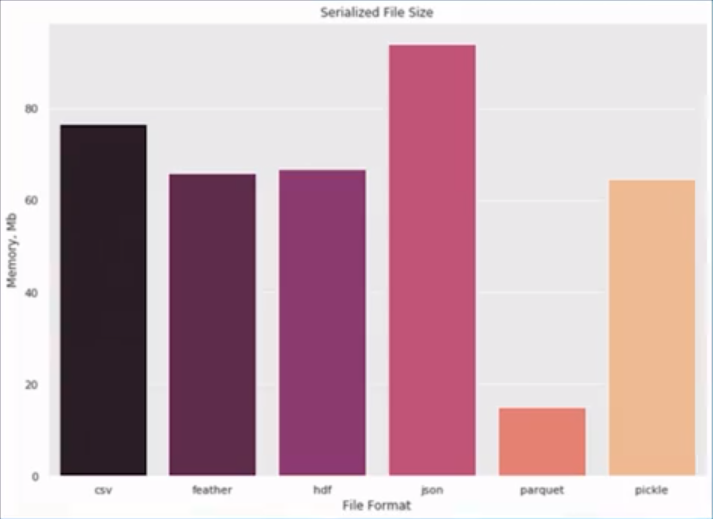

### Categorizando variables

Si hacemos una categorización de las variables ayuda a la compresión de datos
*  Los formatos binarios bajan de 80 a 15~17 Mb, pues son formatos binarios
* CSV y JSON no disminuyen su tamaño (son no binarios).

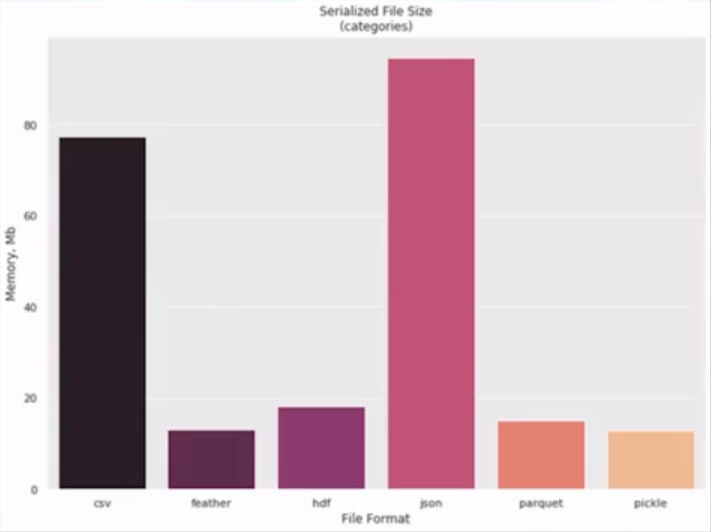

### Tiempos de carga vs tiempos de guardado

* json y csv nuevamente son los que mas tardarán en cargar o guardarse
* HDF es un formato optimizado para trabajar en big data.

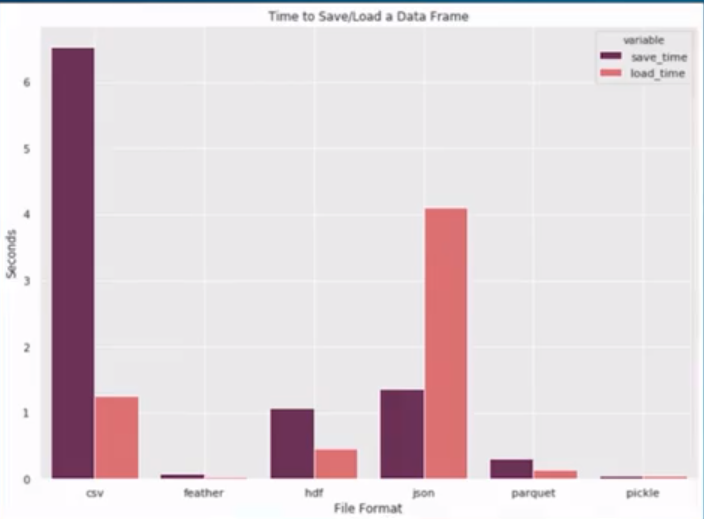

### Crecimiento del consumo de picos de memoria cuando se guarda y carga 

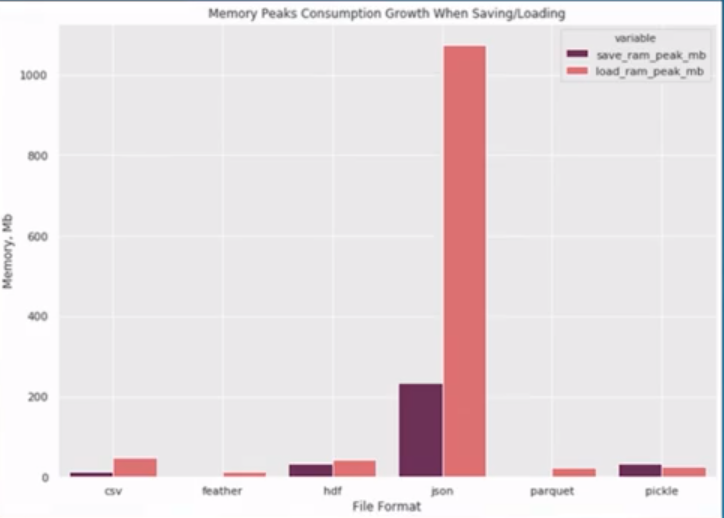

### Crecimiento del consumo de picos de memoria cuando se guarda y carga (categorizando)


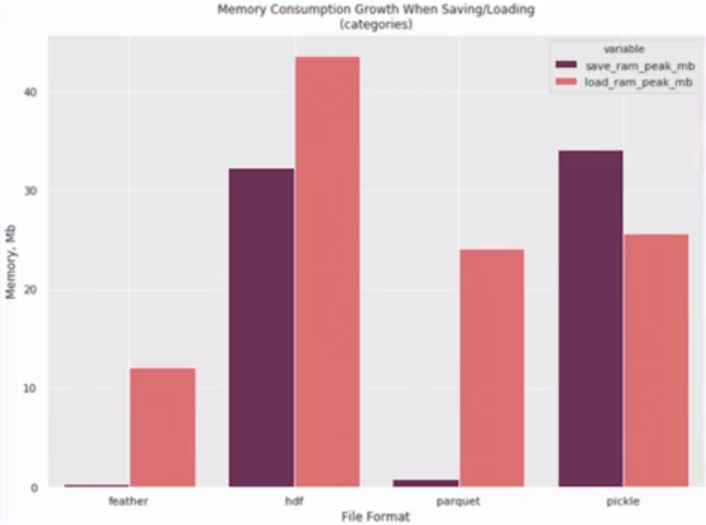

## Tipos de variables que componen un Data Frame

* Para descargar datos puedes usar [Google Data Search](https://datasetsearch.research.google.com/) que es un buscador de bases de datos. 
* En este caso usaremos la [base de datos de meteoritos](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) de la NASA. (Dependiendo de cuando la descargues, esta base de datos se puede actualizar).

In [2]:
import pandas as pd
pd.__version__

'1.3.1'

In [4]:
import pandas as pd

dir_meteorites = 'datasets/Meteorite_Landings.csv'

df_meteorites = pd.read_csv(dir_meteorites)
df_meteorites.head(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [5]:
df_meteorites.shape   #Filas , columnas

(45716, 10)

* Como te das cuenta, esta base de datos es muy grande. 
* Puedes usar `head()` para ver los primeros datos.
* Con `tail()` verás los últimos.
* Con `sample()` tendrás una muestra random de datos.

In [29]:
df_meteorites.tail(5)  #Si no pasas un argumento, te devuelve 5

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01T00:00:00.000,13.63333,79.41667,"(13.63333, 79.41667)"
996,Tissint,54823,Valid,Martian (shergottite),7000.0,Fell,2011-01-01T00:00:00.000,29.48195,-7.61123,"(29.48195, -7.61123)"
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"(-7.08333, 111.53333)"
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,"(-6.66667, 106.58333)"
999,Tomakovka,24019,Valid,LL6,600.0,Fell,1905-01-01T00:00:00.000,47.85000,34.76667,"(47.85, 34.76667)"


In [31]:
df_meteorites.sample(5)   

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
365,Harleton,11830,Valid,L6,8360.0,Fell,1961-01-01T00:00:00.000,32.67500,-94.51167,"(32.675, -94.51167)"
806,Pokhra,18858,Valid,H5,350.0,Fell,1866-01-01T00:00:00.000,26.71667,82.66667,"(26.71667, 82.66667)"
181,Chainpur,5315,Valid,LL3.4,8200.0,Fell,1907-01-01T00:00:00.000,25.85000,83.48333,"(25.85, 83.48333)"
18,Al Zarnkh,447,Valid,LL5,700.0,Fell,2001-01-01T00:00:00.000,13.66033,28.96000,"(13.66033, 28.96)"
179,Chadong,5313,Valid,L6,3700.0,Fell,1998-01-01T00:00:00.000,28.53333,109.31667,"(28.53333, 109.31667)"


In [6]:
df_meteorites.size  #filas por columnas

457160

* Para obtener datos estadísticos generales de las variables numéricas usamos `describe()`.
* Obtendremos percentiles, entre otros.

In [7]:
#para dar formato a los números que se muestran
pd.options.display.float_format='{:,.1f}'.format

In [8]:
df_meteorites.describe()

,id,mass (g),reclat,reclong
count,"45,716.0","45,585.0","38,401.0","38,401.0"
mean,"26,889.7","13,278.1",-39.1,61.1
std,"16,860.7","574,988.9",46.4,80.6
min,1.0,0.0,-87.4,-165.4
25%,"12,688.8",7.2,-76.7,0.0
50%,"24,261.5",32.6,-71.5,35.7
75%,"40,656.8",202.6,0.0,157.2
max,"57,458.0","60,000,000.0",81.2,354.5


* Si queremos incluir todos los datos (strings, numéricos, etc.) dentro de `describe()`, lo hacemos agregando `include='all'` como argumento. 

In [37]:
df_meteorites.describe(include='all')

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
count,1000,"1,000.0",1000,1000,972.0,1000,999,988.0,988.0,988
unique,1000,nan,1,118,nan,2,247,nan,nan,986
top,Phillips County (stone),nan,Valid,L6,nan,Fell,1933-01-01T00:00:00.000,nan,nan,"(7.05, 12.43333)"
freq,1,nan,1000,242,nan,996,16,nan,nan,2
mean,NaN,"15,398.7",NaN,NaN,"50,190.2",NaN,NaN,29.7,19.2,NaN
std,NaN,"10,368.7",NaN,NaN,"753,985.7",NaN,NaN,23.2,68.6,NaN
min,NaN,1.0,NaN,NaN,0.1,NaN,NaN,-44.1,-157.9,NaN
25%,NaN,"7,770.5",NaN,NaN,679.5,NaN,NaN,21.3,-5.2,NaN
50%,NaN,"12,757.5",NaN,NaN,"2,870.0",NaN,NaN,35.9,17.3,NaN
75%,NaN,"18,831.2",NaN,NaN,"10,050.0",NaN,NaN,45.8,76.0,NaN


In [9]:
df_meteorites.info()   #Información de las variables del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


In [10]:
df_meteorites.dtypes   #Solo vez el tipo de dato

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [11]:
df_meteorites.convert_dtypes()  #Convierte objects a strings. Lo hace más ágil

name            string
id               Int64
nametype        string
recclass        string
mass (g)       Float64
fall            string
year            string
reclat         Float64
reclong        Float64
GeoLocation     string
dtype: object

In [12]:
df_m=df_meteorites.convert_dtypes()   #Convierte objects a strings. Lo hace más ágil

In [13]:
df_m.dtypes


name            string
id               Int64
nametype        string
recclass        string
mass (g)       Float64
fall            string
year            string
reclat         Float64
reclong        Float64
GeoLocation     string
dtype: object

## Estructuras de Data Frames en detalle
* Vamos a ver más a profundidad sobre las estructuras de Data Frames.
* Para ver los valores únicos de cada columna ponemos:

In [1]:
import pandas as pd

dir_meteorites = 'datasets/Meteorite_Landings.csv'
df_meteorites = pd.read_csv(dir_meteorites)

In [2]:
df_meteorites=df_meteorites.convert_dtypes()

In [14]:
df_meteorites.nunique()  #cuántos datos únicos hay en cada variable

name           45716
id             45716
nametype           2
recclass         466
mass (g)       12576
fall               2
year             266
reclat         12738
reclong        14640
GeoLocation    17100
dtype: int64

* Veamos en detalle las columnas `fall` y `nametype`. pues solo toma 2 posibles valores en nuestro dataset, veamos cuales son

In [18]:
df_meteorites[['fall', 'nametype']]

,fall,nametype
0,Fell,Valid
1,Fell,Valid
2,Fell,Valid
3,Fell,Valid
4,Fell,Valid
...,...,...
45711,Found,Valid
45712,Found,Valid
45713,Found,Valid
45714,Found,Valid


In [3]:
df_meteorites.dtypes

name            string
id               Int64
nametype        string
recclass        string
mass (g)       Float64
fall            string
year            string
reclat         Float64
reclong        Float64
GeoLocation     string
dtype: object

este tipo de variables son variables categóricas
* A `fall` y a `nametype` les vamos a cambiar el data type a `category`. 

In [19]:
df_meteorites[['fall', 'nametype']].astype('category')

,fall,nametype
0,Fell,Valid
1,Fell,Valid
2,Fell,Valid
3,Fell,Valid
4,Fell,Valid
...,...,...
45711,Found,Valid
45712,Found,Valid
45713,Found,Valid
45714,Found,Valid


In [4]:
df_meteorites[['fall', 'nametype']] = df_meteorites[['fall', 'nametype']].astype('category')

df_meteorites.dtypes

name             string
id                Int64
nametype       category
recclass         string
mass (g)        Float64
fall           category
year             string
reclat          Float64
reclong         Float64
GeoLocation      string
dtype: object

Ahora tenemos el formato adecuadop para cada variable

* También podemos ver los valores únicos de una columna:

In [22]:
#valores unicos de una serie
df_meteorites['fall'].unique()

['Fell', 'Found']
Categories (2, object): ['Fell', 'Found']

* Para contar los valores únicos de esa columna:

In [23]:
#la cantidad de veces que se repiten los elementos
df_meteorites['fall'].value_counts()

Found    44609
Fell      1107
Name: fall, dtype: int64

### Variables tipo dummy

Otra forma muy útil de trabajar con variables categóricas es trabajar con variables dummy

* A las variables tipo texto les asignas un número.
* Son importantes en el análisis de datos.
* Cada valor único se puede transformar en una columna.

In [24]:
pd.get_dummies(df_meteorites['fall'])

,Fell,Found
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45711,0,1
45712,0,1
45713,0,1
45714,0,1


### Creando nuevas columnas para tu Data Frame

In [5]:
df_meteorites['ones'] = 1   #Esto crea una columna llena de 1
df_meteorites.head(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,ones
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.775,6.08333,"(50.775, 6.08333)",1
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",1
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.0,"(54.21667, -113.0)",1
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.9,"(16.88333, -99.9)",1
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95,"(-33.16667, -64.95)",1


* Agregamos las columnas dumy al dataframe:

In [6]:
df_meteorites[['fell', 'found']] = pd.get_dummies(df_meteorites['fall'])
df_meteorites.head(6)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,ones,fell,found
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.775,6.08333,"(50.775, 6.08333)",1,1,0
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",1,1,0
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.0,"(54.21667, -113.0)",1,1,0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.9,"(16.88333, -99.9)",1,1,0
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95,"(-33.16667, -64.95)",1,1,0
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,01/01/1919 12:00:00 AM,32.1,71.8,"(32.1, 71.8)",1,1,0


### Creando variables tipo fecha

* La columna year de nuestroData Frame tiene valores tipo string.
* Debemos transformarlos a tipo fecha.

In [9]:
df_meteorites[['year']].head(5)

,year
0,01/01/1880 12:00:00 AM
1,01/01/1951 12:00:00 AM
2,01/01/1952 12:00:00 AM
3,01/01/1976 12:00:00 AM
4,01/01/1902 12:00:00 AM


In [ ]:
pd.to_datetime(
    df_meteorites['year'],
    errors='coerce',   #Este argumento hace que haya NaN
    format='%m/%d/%Y %H:%M:%S %p' # si se omite solo tomará la fecha sin hora
    #infer_datetime_format=True
)

In [10]:
df_meteorites['year'] = pd.to_datetime(
    df_meteorites['year'],
    errors='coerce',    #Este argumento hace que haya NaT, not a time
    format='%m/%d/%Y %H:%M:%S %p'
)

In [12]:
df_meteorites.sample(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,ones,fell,found
33918,Queen Alexandra Range 97284,20742,Valid,LL5,23.9,Found,1997-01-01 12:00:00,-84.0,168.0,"(-84.0, 168.0)",1,0,1
36,Andura,2298,Valid,H6,17900.0,Fell,1939-01-01 12:00:00,20.88333,76.86667,"(20.88333, 76.86667)",1,1,0
19333,Larkman Nunatak 06492,48776,Valid,H6,8.2,Found,2006-01-01 12:00:00,<NA>,<NA>,<NA>,1,0,1
42517,Yamato 82057,29251,Valid,H4,123.08,Found,1982-01-01 12:00:00,-71.5,35.66667,"(-71.5, 35.66667)",1,0,1
1639,Allan Hills 03542,35732,Valid,L6,20.4,Found,2003-01-01 12:00:00,<NA>,<NA>,<NA>,1,0,1


In [13]:
df_meteorites.dtypes

name                   string
id                      Int64
nametype             category
recclass               string
mass (g)              Float64
fall                 category
year           datetime64[ns]
reclat                Float64
reclong               Float64
GeoLocation            string
ones                    int64
fell                    uint8
found                   uint8
dtype: object

### Cambiando el nombre de una columna
*  `.rename(  )` que acepta como argumento un diccionario, key es el nombre original y values será el nombre que tomará.
* El argumento `inplace=True` hace que se guarde sobre el Data Frame.

In [15]:
df_meteorites.rename(columns={'mass (g)':'mass'}, inplace=True)

df_meteorites.head(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,ones,fell,found
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01 12:00:00,50.775,6.08333,"(50.775, 6.08333)",1,1,0
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01 12:00:00,56.18333,10.23333,"(56.18333, 10.23333)",1,1,0
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01 12:00:00,54.21667,-113.0,"(54.21667, -113.0)",1,1,0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01 12:00:00,16.88333,-99.9,"(16.88333, -99.9)",1,1,0
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01 12:00:00,-33.16667,-64.95,"(-33.16667, -64.95)",1,1,0


In [ ]:
#Obtengamos los nombres de columnas
list(df_meteorites)

['name',
 'id',
 'nametype',
 'recclass',
 'mass',
 'fall',
 'year',
 'reclat',
 'reclong',
 'GeoLocation',
 'ones',
 'fell',
 'found']

In [16]:
df_meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation', 'ones', 'fell', 'found'],
      dtype='object')

## Borrar filas, columnas y copiar información
* `axis = `0 --> filas, 1-->columnas, por default es 0
* `inplace` por default is False indica si se quiere sobreescribir el dataframe o no

In [ ]:
df_meteorites.drop(['ones'], axis=1, inplace=True)  #Nos aseguramos que se guarde en el DF

df_meteorites.head(5)

* Vamos a borrar filas.
* Cuando hacemos drop de una lista, Pandas reconoce que nos referimos a filas.

In [18]:
df_meteorites.drop([0, 2, 4, 6]).head(4) # NO colocamos inplace para no sobreescribir


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,ones,fell,found
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01 12:00:00,56.18333,10.23333,"(56.18333, 10.23333)",1,1,0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01 12:00:00,16.88333,-99.9,"(16.88333, -99.9)",1,1,0
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919-01-01 12:00:00,32.1,71.8,"(32.1, 71.8)",1,1,0
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01 12:00:00,44.21667,0.61667,"(44.21667, 0.61667)",1,1,0


* De la siguiente forma indicamos las columnas y filas que queremos eliminar:

In [ ]:
df_meteorites.drop(columns=['id', 'recclass'], index=[0, 2, 4, 6])

* SIEMPRE MANTÉN AL DATA FRAME ORIGINAL INTACTO.
* Lo recomendable es hacer una copia y trabajar con ella (borrar, agregar, etc).
* Debes hacer una copia profunda, no asignar directamente a una variable, puies los cambios se ven reflejados en ambas
* `deep`si True--> la copia no afectará al original, if False: la copia afectará al original

In [19]:
df1 = df_meteorites.copy(deep=True)  #Haces una copia con esta linea
df1.drop(['id'], axis=1, inplace=True)  #Modificas la copia
df1.head(2)

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,ones,fell,found
0,Aachen,Valid,L5,21.0,Fell,1880-01-01 12:00:00,50.775,6.08333,"(50.775, 6.08333)",1,1,0
1,Aarhus,Valid,H6,720.0,Fell,1951-01-01 12:00:00,56.18333,10.23333,"(56.18333, 10.23333)",1,1,0


In [20]:
df1.drop(['ones'], axis=1, inplace=True)

In [21]:
df1.head(3)

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,fell,found
0,Aachen,Valid,L5,21.0,Fell,1880-01-01 12:00:00,50.775,6.08333,"(50.775, 6.08333)",1,0
1,Aarhus,Valid,H6,720.0,Fell,1951-01-01 12:00:00,56.18333,10.23333,"(56.18333, 10.23333)",1,0
2,Abee,Valid,EH4,107000.0,Fell,1952-01-01 12:00:00,54.21667,-113.0,"(54.21667, -113.0)",1,0


# Aplicando Pandas

[Código de clases](https://colab.research.google.com/drive/1kP-uz946kqxTy04bL69vYVNEL2bm454q#scrollTo=1p5rv3NxRHrN)

## Funciones matemáticas

* Vamos a aplicar operaciones matemáticas a un Data Frame nuevo.
* [London bike sharing dataset](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset).

In [1]:
import pandas as pd
import numpy as np

df_lmerged = pd.read_csv('datasets/london_merged.csv')

df_lmerged.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [2]:
#reconocer el tipo de datos que tenemos en el dataframe
df_lmerged.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [2]:
#a veces si el formato no es muy complejo, pandas puede identificarlo
df_lmerged['timestamp'] = pd.to_datetime(df_lmerged['timestamp'])
df_lmerged.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [3]:
# cuando las columnas ya tiene formato tiempo, se puede obtener la hora
df_lmerged['hour'] = df_lmerged['timestamp'].dt.hour  #Crea una columna solo con la hora
df_lmerged['hour']

0         0
1         1
2         2
3         3
4         4
         ..
17409    19
17410    20
17411    21
17412    22
17413    23
Name: hour, Length: 17414, dtype: int64

In [4]:
#seleccionamos todas menos timestamp
df=df_lmerged.iloc[:, 1:]
#ahora solo  tenemos variables numéricas

* Ahora apliquemos operaciones matemáticas entre la data.

In [6]:
# np.sin para calcular el seno 
#esta operaciones se llevan acabo en todos los valores de la columna
np.sin(df_lmerged['wind_speed']**3 + 10)

0       -0.193444
1        0.088369
2       -0.544021
3       -0.544021
4        0.952069
           ...   
17409    0.995740
17410   -0.159396
17411   -0.999995
17412    0.185789
17413    0.989226
Name: wind_speed, Length: 17414, dtype: float64

In [9]:
#diferencia de temperaturas
df['t1']-df['t2']

0        1.0
1        0.5
2        0.0
3        0.0
4        2.0
        ... 
17409    4.0
17410    4.0
17411    4.0
17412    4.0
17413    4.0
Length: 17414, dtype: float64

In [ ]:
#diferencia de temperaturas, seleccionando los indices de 3 en 3 la columna t1
df['t1'].iloc[::3] - df['t2']   #En los vacíos le pone NaN

0        1.0
1        NaN
2        NaN
3        0.0
4        NaN
        ... 
17409    4.0
17410    NaN
17411    NaN
17412    4.0
17413    NaN
Length: 17414, dtype: float64

Existen métodos con las cuales se pueden operar elementos vacíos oque no existen NaN
```
+    add()
-    sub(), subtract()
*    mul(), multiply()
/    truediv(), div(), divide()
//   floordiv()
%    mod()
**   pow()
```

In [ ]:
#.sub para hacer substracción

df_lmerged['t1'].iloc[::3].sub(df_lmerged['t2'], fill_value=1000)  

0           1.0
1         997.5
2         997.5
3           0.0
4        1000.0
          ...  
17409       4.0
17410     999.0
17411     998.5
17412       4.0
17413     999.0
Length: 17414, dtype: float64

* Vamos a hacer divisiones y producto punto.

In [ ]:
df_lmerged['t1'] / df_lmerged['t2']  #División

0        1.500000
1        1.200000
2        1.000000
3        1.000000
4             inf
           ...   
17409    5.000000
17410    5.000000
17411    3.666667
17412    3.666667
17413    5.000000
Length: 17414, dtype: float64

In [ ]:
df_lmerged['t1'] * df_lmerged['t2']  #Multiplicación

0        6.00
1        7.50
2        6.25
3        4.00
4        0.00
         ... 
17409    5.00
17410    5.00
17411    8.25
17412    8.25
17413    5.00
Length: 17414, dtype: float64

In [ ]:
np.dot(df_lmerged['t1'], df_lmerged['t2'])   #dot product

3135730.277777778

## Funciones más complejas y lambdas

* Puedes usar el métodod `apply` para aplicar funciones (o 'algo' al Data Frame).
* `apply` viene por defecto con `axis=0` que significa que funciona para columnas.
* Si pones `axis=1` se aplica para filas. 

Además de apply, también se pueden usar las funciones applymap y map, dependiendo de la necesidad.

    * apply() se utiliza para aplicar una función a lo largo de un eje (columna o fila).
    * applymap() se usa para aplicar una función a todos los elementos del DataFrame
    * map() se usa para sustituir cada valor de una fila por otro valor.

Un ejemplo del uso de map() sería:
```df['wind_speed'].map('The wind speed is {}'.format)```

Primera gran diferencia: DEFINICIÓN

* map se define en Serie SOLAMENTE
* applymap está definido en DataFrames SOLAMENTE
* aply se define en AMBOS

Segunda gran diferencia: ARGUMENTO DE ENTRADA

* map acepta dicts Series, o invocable
* applymap y apply acepta solo llamadas

Tercera gran diferencia: COMPORTAMIENTO

* map es elementwise para Series
* applymap es elementwise para DataFrames
* apply también funciona con elementos, pero es adecuado para operaciones y agregaciones más * complejas. El comportamiento y el valor de retorno dependen de la función.

Cuarta diferencia principal (la más importante): CASO DE USO

* map está diseñado para mapear valores de un dominio a otro, por lo que está optimizado para el rendimiento (p. ej., df[‘A’].map({1:‘a’, 2:‘b’, 3:‘c’}))
* applymap es bueno para transformaciones de elementos en varias filas / columnas (p. ej., df[[‘A’, ‘B’, ‘C’]].applymap(str.strip))
* apply es para aplicar cualquier función que no se pueda vectorizar (p. ej., ```df[‘sentences’].apply(nltk.sent_tokenize)```)


In [24]:
df['wind_speed'].map('The wind speed is {}'.format)

0         The wind speed is 6.0
1         The wind speed is 5.0
2         The wind speed is 0.0
3         The wind speed is 0.0
4         The wind speed is 6.5
                  ...          
17409    The wind speed is 19.0
17410    The wind speed is 21.0
17411    The wind speed is 24.0
17412    The wind speed is 23.0
17413    The wind speed is 22.0
Name: wind_speed, Length: 17414, dtype: object

In [3]:
def fun_1(x):
  y = x**2 + 1
  return y

In [9]:
fun_1(df['hour'])

0          1
1          2
2          5
3         10
4         17
        ... 
17409    362
17410    401
17411    442
17412    485
17413    530
Name: hour, Length: 17414, dtype: int64

In [8]:
df['hour'].apply(fun_1)

0          1
1          2
2          5
3         10
4         17
        ... 
17409    362
17410    401
17411    442
17412    485
17413    530
Name: hour, Length: 17414, dtype: int64

In [11]:
# los valores definidos en a y b son los valores que toma si se omiten

def fun_2(x, a=1, b=0):
    y = x**2 + a*x + b
    return y

In [13]:
fun_2(df['hour'],10,-100)

0       -100
1        -89
2        -76
3        -61
4        -44
        ... 
17409    451
17410    500
17411    551
17412    604
17413    659
Name: hour, Length: 17414, dtype: int64

In [14]:
df['hour'].apply(fun_2, a=1, b=-100)

0       -100
1        -98
2        -94
3        -88
4        -80
        ... 
17409    280
17410    320
17411    362
17412    406
17413    452
Name: hour, Length: 17414, dtype: int64

In [23]:
df['t1'].apply(lambda x : ((x*9)/5)+32) #farenheit

0        37.4
1        37.4
2        36.5
3        35.6
4        35.6
         ... 
17409    41.0
17410    41.0
17411    41.9
17412    41.9
17413    41.0
Name: t1, Length: 17414, dtype: float64

In [5]:
df.apply(lambda x:x.mean())

cnt             1143.101642
t1                12.468091
t2                11.520836
hum               72.324954
wind_speed        15.913063
weather_code       2.722752
is_holiday         0.022051
is_weekend         0.285403
season             1.492075
hour              11.513265
dtype: float64

In [25]:
df_lmerged.apply(lambda x: x.std())

timestamp       211 days 05:11:06.233727904
cnt                             1085.108068
t1                                 5.571818
t2                                 6.615145
hum                               14.313186
wind_speed                          7.89457
weather_code                       2.341163
is_holiday                         0.146854
is_weekend                         0.451619
season                             1.118911
hour                               6.915893
dtype: object

In [6]:
df['t1'].head(4)

0    3.0
1    3.0
2    2.5
3    2.0
Name: t1, dtype: float64

In [7]:
df['t2'].head(4)

0    2.0
1    2.5
2    2.5
3    2.0
Name: t2, dtype: float64

In [8]:
#por fila
df.apply(lambda x: x['t1']-x['t2'], axis=1)

0        1.0
1        0.5
2        0.0
3        0.0
4        2.0
        ... 
17409    4.0
17410    4.0
17411    4.0
17412    4.0
17413    4.0
Length: 17414, dtype: float64

* `apply` funciona a lo largo de un ejece (fila o columna).
* `applymap` aplica funciones a TODOS los elementos del Data Frame. Solo funciona con Data Frames.
* `map` es para sustituir el valor de una fila por otro valor. Solo funciona en series.

## Múltiples índices
* Son útiles porque puedes aplicar operaciones matemáticas en varios niveles.
* También puedes tener mejor organizada la información.
* En este ejemplo usaremos los [datos de la población mundial](https://data.worldbank.org/indicator/SP.POP.TOTL) de la base de datos del Banco Mundial.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_pob = pd.read_csv('downloadedData/poblacion.csv')
df_pob

,Country,year,pop
0,Afghanistan,2015,3.441360e+07
1,Albania,2015,2.880703e+06
2,Algeria,2015,3.972802e+07
3,American Samoa,2015,5.581200e+04
4,Andorra,2015,7.801100e+04
...,...,...,...
1035,Pre-demographic dividend,2018,9.194854e+08
1036,Small states,2018,4.057532e+07
1037,South Asia,2018,1.814389e+09
1038,South Asia (IDA & IBRD),2018,1.814389e+09


* Como te das cuenta, el índice por defecto que pandas te pone son los números a la izquierda.
* Hagamos que las columnas `Country` y `year` sean los índices.

In [ ]:
df_pob['year'] = pd.Categorical(df_pob['year'].apply(str))
df_pob.dtypes

Country      object
year       category
pop         float64
dtype: object

* Primero aplicamos un filtro para seleccionar solo a Ecuador y Colombia.
* Después creamos un Data Frame de muestra solo con estos países.
* A este Data Frame le aplicamos los múltiples índices.

In [ ]:
idx_filter = df_pob['Country'].isin(['Ecuador', 'Colombia']) #Filtro
df_sample = df_pob[idx_filter]  #Creamos este nuevo Data Frame
df_sample = df_sample.set_index(['Country', 'year']).sort_index() #Aplicando índices y ordenando

df_sample

pop
Country  year            
Colombia 2015  47520667.0
         2016  48171392.0
         2017  48901066.0
         2018  49648685.0
Ecuador  2015  16212020.0
         2016  16491115.0
         2017  16785361.0
         2018  17084357.0

In [ ]:
df_sample.loc['Ecuador', :]

,pop
year,
2015,16212020.0
2016,16491115.0
2017,16785361.0
2018,17084357.0


In [ ]:
#Pero es más fácil buscar los datos así
df_sample.xs(['Ecuador', '2018'])

pop    17084357.0
Name: (Ecuador, 2018), dtype: float64

In [ ]:
#Según el nivel del índice también puedes hacer tu búsqueda
df_sample.xs('2018', level='year')

,pop
Country,
Colombia,49648685.0
Ecuador,17084357.0


In [ ]:
#Podemos ordenar los índices de mayor a menor o viceversa
df_countries = df_pob.set_index(['Country', 'year']).sort_index(ascending=[True, True])
#Para que sea de "mayor" a "menor" pones ascending=[False, True]
df_countries

pop
Country     year            
Afghanistan 2015  34413603.0
            2016  35383128.0
            2017  36296400.0
            2018  37172386.0
Albania     2015   2880703.0
...                      ...
Zambia      2018  17351822.0
Zimbabwe    2015  13814629.0
            2016  14030390.0
            2017  14236745.0
            2018  14439018.0

[1040 rows x 1 columns]

In [ ]:
#Vamos a traer un pedazo de esa data
df_countries.loc[pd.IndexSlice['Aruba':'Austria', '2015':'2016'], :].sort_index()

pop
Country   year            
Aruba     2015    104341.0
          2016    104872.0
Australia 2015  23815995.0
          2016  24190907.0
Austria   2015   8642699.0
          2016   8736668.0

In [ ]:
#Traigamos la población de Uruguay en 2018
df_countries['pop']['Uruguay']['2018']

3449299.0

In [ ]:
#Obtengamos la suma de la población de todos los países para cada año
df_countries.sum(level='year')

,pop
year,
2015,6.567915e+10
2016,6.648793e+10
2017,6.729418e+10
2018,6.808789e+10


In [ ]:
#Quitemos el index para country
df_countries.unstack('Country')

pop                                                 \
Country Afghanistan    Albania     Algeria American Samoa  Andorra   
year                                                                 
2015     34413603.0  2880703.0  39728025.0        55812.0  78011.0   
2016     35383128.0  2876101.0  40551404.0        55741.0  77297.0   
2017     36296400.0  2873457.0  41389198.0        55620.0  77001.0   
2018     37172386.0  2866376.0  42228429.0        55465.0  77006.0   

                                                                             \
Country      Angola Antigua and Barbuda   Arab World   Argentina    Armenia   
year                                                                          
2015     27884381.0             93566.0  396028278.0  43131966.0  2925553.0   
2016     28842484.0             94527.0  404024433.0  43590368.0  2936146.0   
2017     29816748.0             95426.0  411898965.0  44044811.0  2944809.0   
2018     30809762.0             96286.0  419790588.0  44494502.0  2951776.0   

         ...                                                             \
Country  ...    Uruguay  Uzbekistan   Vanuatu Venezuela, RB     Vietnam   
year     ...                                                              
2015     ...  3412009.0  31298900.0  271130.0    30081829.0  92677076.0   
2016     ...  3424132.0  31847900.0  278330.0    29846179.0  93638724.0   
2017     ...  3436646.0  32388600.0  285510.0    29390409.0  94596642.0   
2018     ...  3449299.0  32955400.0  292680.0    28870195.0  95540395.0   

                                                                          \
Country Virgin Islands (U.S.) West Bank and Gaza Yemen, Rep.      Zambia   
year                                                                       
2015                 107710.0          4270092.0  26497889.0  15879361.0   
2016                 107510.0          4367088.0  27168210.0  16363507.0   
2017                 107268.0          4454805.0  27834821.0  16853688.0   
2018                 106977.0          4569087.0  28498687.0  17351822.0   

                     
Country    Zimbabwe  
year                 
2015     13814629.0  
2016     14030390.0  
2017     14236745.0  
2018     14439018.0  

[4 rows x 260 columns]

In [ ]:
#Quitemos el index para year 
df_countries.unstack('year')

pop                                    
year                         2015        2016        2017        2018
Country                                                              
Afghanistan            34413603.0  35383128.0  36296400.0  37172386.0
Albania                 2880703.0   2876101.0   2873457.0   2866376.0
Algeria                39728025.0  40551404.0  41389198.0  42228429.0
American Samoa            55812.0     55741.0     55620.0     55465.0
Andorra                   78011.0     77297.0     77001.0     77006.0
...                           ...         ...         ...         ...
Virgin Islands (U.S.)    107710.0    107510.0    107268.0    106977.0
West Bank and Gaza      4270092.0   4367088.0   4454805.0   4569087.0
Yemen, Rep.            26497889.0  27168210.0  27834821.0  28498687.0
Zambia                 15879361.0  16363507.0  16853688.0  17351822.0
Zimbabwe               13814629.0  14030390.0  14236745.0  14439018.0

[260 rows x 4 columns]

## Cómo trabajar con variables tipo texto en Pandas
* Pandas tiene muchas funcionalidades interesantes para trabajar con procesamiento del lenguaje natural.
* Primero creemos un diccionario y un Data Frame de este.

In [ ]:
import pandas as pd

data = {'names':['Sara Moreno 34',
                 'jUAn GOMez 23',
                 'CArlos mArtinez 89',
                 'Alfredo VelaZques 3',
                 'luis Mora 56',
                 '@freddier #platzi 10',pd.NA]}

df = pd.DataFrame(data)
df

,names
0,Sara Moreno 34
1,jUAn GOMez 23
2,CArlos mArtinez 89
3,Alfredo VelaZques 3
4,luis Mora 56
5,@freddier #platzi 10
6,<NA>


* Existen varias funcionalidades que podríamos aplicar a este Data Frame con variables tipo texto.
* Pero veremos las más importatntes y menos obvias.

In [ ]:
#Por ejemplo, para hacer todo minúsculas
df['names'].str.lower()
#Para mayúsculas usar upper() y para la primera mayúscyala usar capitalize()

0          sara moreno 34
1           juan gomez 23
2      carlos martinez 89
3     alfredo velazques 3
4            luis mora 56
5    @freddier #platzi 10
6                    <NA>
Name: names, dtype: object

In [ ]:
#Para hacer una lista con un split
df['names'].str.split() #Agregas el argumento que desees, como en JavaScript

0          [Sara, Moreno, 34]
1           [jUAn, GOMez, 23]
2      [CArlos, mArtinez, 89]
3     [Alfredo, VelaZques, 3]
4            [luis, Mora, 56]
5    [@freddier, #platzi, 10]
6                        <NA>
Name: names, dtype: object

* Puedes aplicar funciones de búsqueda, conteo, reemplazo y expresiones regulares.

In [ ]:
#Para extraer los números aplicamos
df['names'].str.extract('([0-9]+)', expand=False)

0     34
1     23
2     89
3      3
4     56
5     10
6    NaN
Name: names, dtype: object

In [ ]:
#Para extraer todo lo que tenga un hash (#)
df['names'].str.replace('#[^\s]+','')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0         Sara Moreno 34
1          jUAn GOMez 23
2     CArlos mArtinez 89
3    Alfredo VelaZques 3
4           luis Mora 56
5          @freddier  10
6                   <NA>
Name: names, dtype: object

* Recuerda que lo importante es leer la documentación y, sobre todo, **saber googlear**. Nunca te aprendas las cosas de memoria.

## Concatenación de Data Frames: concat y append
* Cuando los datos están disponibles en porciones las funciones `concat` y `append` son muy útiles para el análisis.
* Puedes usar ambas funciones para concatenar.
* Primero veremos un ejemplo concatenando matrices con Numpy.

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
x1 = np.random.rand(2, 5)*10 #Una matriz random 2x5 del 0 al 10.
x2 = np.random.rand(2, 5)*-10 #Una matriz random 2x5 del -10 al 0.

In [ ]:
#Ahora las concatenamos como una matrix 4x5
np.concatenate([x1, x2])

array([[ 8.46033435,  3.57143037,  7.08992901,  0.49917167,  1.83992572],
       [ 0.20935134,  2.07911717,  1.41154059,  5.2867511 ,  0.27461591],
       [-0.13497841, -0.05106847, -5.11522408, -6.49708612, -5.6162797 ],
       [-9.86727883, -5.06547031, -7.29344948, -7.17124352, -5.9910829 ]])

In [ ]:
#Para hacer una matriz 2x10 indicamos el axis=1 o hacemos la traspuesta
np.concatenate([x1.T, x2.T])

array([[ 8.46033435,  0.20935134],
       [ 3.57143037,  2.07911717],
       [ 7.08992901,  1.41154059],
       [ 0.49917167,  5.2867511 ],
       [ 1.83992572,  0.27461591],
       [-0.13497841, -9.86727883],
       [-0.05106847, -5.06547031],
       [-5.11522408, -7.29344948],
       [-6.49708612, -7.17124352],
       [-5.6162797 , -5.9910829 ]])

### Concatenando series en Pandas
* Ahora concatenaremos series.

In [ ]:
s1 = pd.Series(x1[0], index=['a','b','c','d','e'])
s2 = pd.Series(x2[0], index=['c', 'd', 'e', 'f', 'g'])

In [ ]:
pd.concat([s1, s2], axis=1)

,0,1
a,8.460334,NaN
b,3.571430,NaN
c,7.089929,-0.134978
d,0.499172,-0.051068
e,1.839926,-5.115224
f,NaN,-6.497086
g,NaN,-5.616280


In [ ]:
#Puedes resetear los índices que pusiste así:
s1.reset_index(drop=True) #Si no pones `drop=True` se te crea una columna de los indices

0    8.460334
1    3.571430
2    7.089929
3    0.499172
4    1.839926
dtype: float64

In [ ]:
pd.concat([s1.reset_index(drop=True), s2.reset_index(drop=True)], axis=1)

,0,1
0,8.460334,-0.134978
1,3.571430,-0.051068
2,7.089929,-5.115224
3,0.499172,-6.497086
4,1.839926,-5.616280


### Concatenando Data Frames
* Usas `concat` o `append`, según te sientas más cómodo.

In [ ]:
df1 = pd.DataFrame(np.random.rand(3, 2)*10, columns=['a', 'b'])
df2 = pd.DataFrame(np.random.rand(3, 2)*-10, columns=['a', 'b'], index=[2, 3, 4])

In [ ]:
#Concatenando con `concat`
pd.concat([df1, df2])

,a,b
0,7.715385,0.497343
1,2.397477,7.184309
2,6.094991,6.893195
2,-3.876455,-9.999246
3,-5.811722,-4.964752
4,-5.886120,-1.748309


In [ ]:
pd.concat([df1, df2], axis=1)

,a,b,a,b
0,7.715385,0.497343,NaN,NaN
1,2.397477,7.184309,NaN,NaN
2,6.094991,6.893195,-3.876455,-9.999246
3,NaN,NaN,-5.811722,-4.964752
4,NaN,NaN,-5.886120,-1.748309


In [ ]:
#Si queremos solo la columna que contiene datos (sin ningún NaN)
pd.concat([df1, df2], axis=1, join='inner')

,a,b,a,b
2,6.094991,6.893195,-3.876455,-9.999246


In [ ]:
pd.concat([
           df1.reset_index(drop=True),
           df2.reset_index(drop=True)
           ], axis=1)

,a,b,a,b
0,7.715385,0.497343,-3.876455,-9.999246
1,2.397477,7.184309,-5.811722,-4.964752
2,6.094991,6.893195,-5.886120,-1.748309


In [ ]:
#Puedes usar append y obtener los mismos resultados
df1.append(df2)  #Aquí puedes agregar múltiples Data Frames

,a,b
0,7.715385,0.497343
1,2.397477,7.184309
2,6.094991,6.893195
2,-3.876455,-9.999246
3,-5.811722,-4.964752
4,-5.886120,-1.748309


In [ ]:
#Si quieres hacerlo en sentido de las filas, transpones las matrices
df1.T.append(df2.T).T

,a,b,a,b
0,7.715385,0.497343,NaN,NaN
1,2.397477,7.184309,NaN,NaN
2,6.094991,6.893195,-3.876455,-9.999246
3,NaN,NaN,-5.811722,-4.964752
4,NaN,NaN,-5.886120,-1.748309


## Merge de Data Frames
* Un _merge_ de Data Frames es un tipo de concatenación que se da cuando dos Data Frames tienen una columna en común.
* Es útil cuando tienes fuentes de datos diferentes y quieres unificarlas a través de un parámetro que se comparte entre ellas. 

In [ ]:
import pandas as pd

df_left = pd.DataFrame(
    {'X':['x0','x1','x2','x3'],
    'W':['w0','w1','w2','w3'],
    'Y':['y0','y1','y2','y3'],
    'Mix':['y2','y3','a2','a3']},
    index = ['y2','y3','a2','a3'])

df_right = pd.DataFrame(
    {'Z':['z2','z3','z4','z5'],
     'A':['a2','a3','a4','a5'],
     'Y':['y2','y3','y4','y5']},
    index = [2,3,4,5])

In [ ]:
df_left

,X,W,Y,Mix
y2,x0,w0,y0,y2
y3,x1,w1,y1,y3
a2,x2,w2,y2,a2
a3,x3,w3,y3,a3


In [ ]:
df_right

,Z,A,Y
2,z2,a2,y2
3,z3,a3,y3
4,z4,a4,y4
5,z5,a5,y5


In [ ]:
#Se comparte la columna Y 
#Los elementos en común son y2, y3
#Vamos a hacer un merge de esto

pd.merge(df_left, df_right)

,X,W,Y,Mix,Z,A
0,x2,w2,y2,a2,z2,a2
1,x3,w3,y3,a3,z3,a3


La anterior línea viene con los siguientes comandos por defecto:

In [ ]:
pd.merge(df_left, df_right, how='inner', on='Y')

,X,W,Y,Mix,Z,A
0,x2,w2,y2,a2,z2,a2
1,x3,w3,y3,a3,z3,a3


También puedes hacer _merge_ de la columna `Mix` (por la izquierda) y la columna `Y` (por la derecha).

In [ ]:
pd.merge(df_left, df_right, how='inner', left_on='Mix', right_on='Y')

,X,W,Y_x,Mix,Z,A,Y_y
0,x0,w0,y0,y2,z2,a2,y2
1,x1,w1,y1,y3,z3,a3,y3


Hagamos lo mismo, solo que ahora con la columna `A`.

In [ ]:
pd.merge(df_left, df_right, how='inner', left_on='Mix', right_on='A')

,X,W,Y_x,Mix,Z,A,Y_y
0,x2,w2,y2,a2,z2,a2,y2
1,x3,w3,y3,a3,z3,a3,y3


Como te das cuenta, se crean las columnas `Y_x` (por la izquierda) y `Y_y` (por la derecha). Esto es para diferenciar la una de la otra, ya que `Y` existe para ambos Data Frames.

Pero también les puedes dar nombres a estos sufijos.

In [ ]:
pd.merge(df_left, df_right, how='inner', left_on='Mix', right_on='A', suffixes=['_left', '_right'])

,X,W,Y_left,Mix,Z,A,Y_right
0,x2,w2,y2,a2,z2,a2,y2
1,x3,w3,y3,a3,z3,a3,y3


### ¿De qué formas podemos hacer _merge_ en Data Frames?
![](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

Veamos ejemplos de cada uno de ellos. Recuerda que por defecto el _merge_ viene con `how'inner'` y ya lo vimos antes.

In [ ]:
#how=inner, trae lo que tienen en común las columnas
pd.merge(df_left, df_right, how='inner', on='Y')

,X,W,Y,Mix,Z,A
0,x2,w2,y2,a2,z2,a2
1,x3,w3,y3,a3,z3,a3


In [ ]:
#how='outer'
pd.merge(df_left, df_right, how='outer', on='Y')

,X,W,Y,Mix,Z,A
0,x0,w0,y0,y2,NaN,NaN
1,x1,w1,y1,y3,NaN,NaN
2,x2,w2,y2,a2,z2,a2
3,x3,w3,y3,a3,z3,a3
4,NaN,NaN,y4,NaN,z4,a4
5,NaN,NaN,y5,NaN,z5,a5


In [ ]:
#how='left'
pd.merge(df_left, df_right, how='left', on='Y')

,X,W,Y,Mix,Z,A
0,x0,w0,y0,y2,NaN,NaN
1,x1,w1,y1,y3,NaN,NaN
2,x2,w2,y2,a2,z2,a2
3,x3,w3,y3,a3,z3,a3


In [ ]:
#how='right'
pd.merge(df_left, df_right, how='right', on='Y')

,X,W,Y,Mix,Z,A
0,x2,w2,y2,a2,z2,a2
1,x3,w3,y3,a3,z3,a3
2,NaN,NaN,y4,NaN,z4,a4
3,NaN,NaN,y5,NaN,z5,a5


In [ ]:
#how='outer'
pd.merge(df_left, df_right, how='outer', on='Y')

,X,W,Y,Mix,Z,A
0,x0,w0,y0,y2,NaN,NaN
1,x1,w1,y1,y3,NaN,NaN
2,x2,w2,y2,a2,z2,a2
3,x3,w3,y3,a3,z3,a3
4,NaN,NaN,y4,NaN,z4,a4
5,NaN,NaN,y5,NaN,z5,a5


## ¿Cómo lidiar con datos faltantes en tus Data Frames?

* Es común que en en Data Frame falten datos.
* Recuerda que el NaN es un objeto con propiedades matemáticas. Lo puedes invocar con Numpy.
* Además, las versiones modernas de Pandas ya vienen con el objeto NA.
* Veamos un ejemplo con un data frame. 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame(np.arange(0, 15).reshape(5, 3), columns=['a', 'b', 'c'])
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


Agreguemos algunas variables no definidas.

In [ ]:
df['d'] = np.nan
df['e'] = np.arange(15, 20)
df.loc[5,:] = pd.NA
df.loc[4,'a'] = pd.NA
df.loc[0,'d'] = 1
df.loc[5,'d'] = 10
df

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,NaN,16.0
2,6.0,7.0,8.0,NaN,17.0
3,9.0,10.0,11.0,NaN,18.0
4,<NA>,13.0,14.0,NaN,19.0
5,<NA>,<NA>,<NA>,10,<NA>


In [ ]:
Para reconocer un objeto nulo puedes usar `isnull()` o `isna()`.

SyntaxError: invalid syntax (1042674722.py, line 1)

In [ ]:
df.isnull()

,a,b,c,d,e
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,True,False,False,True,False
5,True,True,True,False,True


Para saber cuántos objetos nulos tienes solo hay que sumar.

In [ ]:
df.isna().sum()  #Por columnas

a    2
b    1
c    1
d    4
e    1
dtype: int64

In [ ]:
df.isna().sum(axis=1)  #Por filas

0    0
1    1
2    1
3    1
4    2
5    4
dtype: int64

O todos los elementos **no nulos** de nuestro Data Frame.

In [ ]:
df.size - df.isna().sum().sum()

21

Ahora filtremos por variables no nulas de la columna a.

In [ ]:
df[df['a'].notnull()]


,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,NaN,16.0
2,6.0,7.0,8.0,NaN,17.0
3,9.0,10.0,11.0,NaN,18.0


Por otra parte, `dropna()` te permite eliminar filas con registros faltantes.

In [ ]:
df.dropna()

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0


In [ ]:
df['c'].dropna()

0     2.0
1     5.0
2     8.0
3    11.0
4    14.0
Name: c, dtype: object

### Entonces, ¿cómo podemos lidiar con registros faltantes?

Puedes emplear el cualquiera de estos métodos. Elige el que mejor se ajuste.

* Llenar con ceros (0) o cualquier otro valor `.fillna(valor)`.
* Llenar con el valor siguiente.
* Llenar con el valor anterior.
* Llenar con la media de los datos existentes por columna o fila.
* Llenar interpolando.
* Hacer una Serie para llenar los valores faltantes.

Veamos ejemplos.

In [ ]:
#Llenando con 0
df.fillna(0)

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,0,16.0
2,6.0,7.0,8.0,0,17.0
3,9.0,10.0,11.0,0,18.0
4,0.0,13.0,14.0,0,19.0
5,0.0,0.0,0.0,10,0.0


In [ ]:
#Llenar con el valor siguiente
df.ffill()

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,1,16.0
2,6.0,7.0,8.0,1,17.0
3,9.0,10.0,11.0,1,18.0
4,9.0,13.0,14.0,1,19.0
5,9.0,13.0,14.0,10,19.0


In [ ]:
#Llenar con el valor siguiente en filas
df.ffill(axis=1)

,a,b,c,d,e
0,0.0,1.0,2.0,1.0,15.0
1,3.0,4.0,5.0,5.0,16.0
2,6.0,7.0,8.0,8.0,17.0
3,9.0,10.0,11.0,11.0,18.0
4,<NA>,13.0,14.0,14.0,19.0
5,<NA>,<NA>,<NA>,10.0,10.0


In [ ]:
#Llenar con el valor anterior. Para hacerlo en columnas pones `axis=1`
df.bfill()

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,10,16.0
2,6.0,7.0,8.0,10,17.0
3,9.0,10.0,11.0,10,18.0
4,<NA>,13.0,14.0,10,19.0
5,<NA>,<NA>,<NA>,10,<NA>


In [ ]:
#Usando la media
df.fillna(df.median())

,a,b,c,d,e
0,0.0,1.0,2.0,1.0,15.0
1,3.0,4.0,5.0,5.5,16.0
2,6.0,7.0,8.0,5.5,17.0
3,9.0,10.0,11.0,5.5,18.0
4,4.5,13.0,14.0,5.5,19.0
5,4.5,7.0,8.0,10.0,17.0


In [ ]:
#Serie predefinida
fill = pd.Series([100, 101, 102])
df['d'] = df['d'].fillna(fill)
df['d'] 

0      1.0
1    101.0
2    102.0
3      NaN
4      NaN
5     10.0
Name: d, dtype: float64

## Group by
* Mapea una serie de elementos, les aplica una función y los agrupa.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Agrupemos el Data Frame por la columna `cut`.

In [ ]:
df.groupby('cut') 

Hasta aquí solo hemos agrupado. Pero podemos aplicar operaciones a este grupo.

In [ ]:
df.groupby('cut').median() 

,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,0.54,61.8,56.0,1810.0,5.250,5.26,3.23
Premium,0.86,61.4,59.0,3185.0,6.110,6.06,3.72
Very Good,0.71,62.1,58.0,2648.0,5.740,5.77,3.56
Good,0.82,63.4,58.0,3050.5,5.980,5.99,3.70
Fair,1.00,65.0,58.0,3282.0,6.175,6.10,3.97


In [ ]:
df.groupby('cut').count() 

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610


In [ ]:
df.groupby('cut')['carat'].count() 

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: carat, dtype: int64

In [ ]:
df.groupby('cut')['price'].min() 

cut
Ideal        326
Premium      326
Very Good    336
Good         327
Fair         337
Name: price, dtype: int64

Puedes aplicar bucles. Al agrupar un Data Frame tienes una 'llave de grupo' y los diferentes grupos. Por eso usamos `key_group` y `group`. Como `group` tiene varias columnas, debes especificar cual vas a usar. En este caso, usamos `group['price']`.

In [ ]:
for key_group, group in df.groupby('cut'):
    grouped_price = group['price'].mean()

    print(f'Cut: {key_group}; Price: {round(grouped_price, 2)} \n')

Cut: Ideal; Price: 3457.54 

Cut: Premium; Price: 4584.26 

Cut: Very Good; Price: 3981.76 

Cut: Good; Price: 3928.86 

Cut: Fair; Price: 4358.76 



También puedes agrupar con más de un parámetro. Agrupemos por `cut` y `color`. Recuerda que, en este caso, las 'llaves de grupo' viene dadas por estos dos parámetros.

In [ ]:
df.groupby(['cut', 'color'])['price'].mean()   #Esto aún no es un Data Frame

cut        color
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Fair       D        4291.061350
           E        3682.312500
           F        382

Convertimos el objeto anterior a un Data Frame con `.to_frame()`.

In [ ]:
df.groupby(['cut', 'color'])['price'].mean().to_frame()

price
cut       color             
Ideal     D      2629.094566
          E      2597.550090
          F      3374.939362
          G      3720.706388
          H      3889.334831
          I      4451.970377
          J      4918.186384
Premium   D      3631.292576
          E      3538.914420
          F      4324.890176
          G      4500.742134
          H      5216.706780
          I      5946.180672
          J      6294.591584
Very Good D      3470.467284
          E      3214.652083
          F      3778.820240
          G      3872.753806
          H      4535.390351
          I      5255.879568
          J      5103.513274
Good      D      3405.382175
          E      3423.644159
          F      3495.750275
          G      4123.482204
          H      4276.254986
          I      5078.532567
          J      4574.172638
Fair      D      4291.061350
          E      3682.312500
          F      3827.003205
          G      4239.254777
          H      5135.683168
          I      4685.445714
          J      4975.655462

También puedes aplicar otras funciones predefinidas. Incluso puedes crear tus funciones y aplicarlas. Para esto utilizas el método `.aggregate()`.

In [ ]:
df.groupby(['cut', 'color'])['price'].aggregate([min, np.mean, np.median,'max'])

#Puedes hacer referencia a las funciones con strings o directamente con su nombre

min         mean  median    max
cut       color                                 
Ideal     D      367  2629.094566  1576.0  18693
          E      326  2597.550090  1437.0  18729
          F      408  3374.939362  1775.0  18780
          G      361  3720.706388  1857.5  18806
          H      357  3889.334831  2278.0  18760
          I      348  4451.970377  2659.0  18779
          J      340  4918.186384  4096.0  18508
Premium   D      367  3631.292576  2009.0  18575
          E      326  3538.914420  1928.0  18477
          F      342  4324.890176  2841.0  18791
          G      382  4500.742134  2745.0  18741
          H      368  5216.706780  4511.0  18795
          I      334  5946.180672  4640.0  18823
          J      363  6294.591584  5063.0  18710
Very Good D      357  3470.467284  2310.0  18542
          E      352  3214.652083  1989.5  18731
          F      357  3778.820240  2471.0  18777
          G      354  3872.753806  2437.0  18818
          H      337  4535.390351  3734.0  18803
          I      336  5255.879568  3888.0  18500
          J      336  5103.513274  4113.0  18430
Good      D      361  3405.382175  2728.5  18468
          E      327  3423.644159  2420.0  18236
          F      357  3495.750275  2647.0  18686
          G      394  4123.482204  3340.0  18788
          H      368  4276.254986  3468.5  18640
          I      351  5078.532567  3639.5  18707
          J      335  4574.172638  3733.0  18325
Fair      D      536  4291.061350  3730.0  16386
          E      337  3682.312500  2956.0  15584
          F      496  3827.003205  3035.0  17995
          G      369  4239.254777  3057.0  18574
          H      659  5135.683168  3816.0  18565
          I      735  4685.445714  3246.0  18242
          J      416  4975.655462  3302.0  18531

Creemos nuestra propia función y apliquémosla.

In [ ]:
def mean_kilo(x):
    return np.mean(x)/1000

df.groupby(['cut', 'color'])['price'].aggregate([min, np.mean, np.median,'max', mean_kilo]).head(10)

min         mean  median    max  mean_kilo
cut     color                                            
Ideal   D      367  2629.094566  1576.0  18693   2.629095
        E      326  2597.550090  1437.0  18729   2.597550
        F      408  3374.939362  1775.0  18780   3.374939
        G      361  3720.706388  1857.5  18806   3.720706
        H      357  3889.334831  2278.0  18760   3.889335
        I      348  4451.970377  2659.0  18779   4.451970
        J      340  4918.186384  4096.0  18508   4.918186
Premium D      367  3631.292576  2009.0  18575   3.631293
        E      326  3538.914420  1928.0  18477   3.538914
        F      342  4324.890176  2841.0  18791   4.324890

Podemos crear un diccionario de instrucciones para aplicar al `aggregate`. Estas instrucciones tendrían como llave la columna del Data Frame y como valor las funciones para aplicar.

In [ ]:
dict_agg = {
    'carat': [min, max], 
    'price': [np.mean, mean_kilo]
}

In [ ]:
df.groupby(['cut', 'color']).aggregate(dict_agg)

carat              price          
                  min   max         mean mean_kilo
cut       color                                   
Ideal     D      0.20  2.75  2629.094566  2.629095
          E      0.20  2.28  2597.550090  2.597550
          F      0.23  2.45  3374.939362  3.374939
          G      0.23  2.54  3720.706388  3.720706
          H      0.23  3.50  3889.334831  3.889335
          I      0.23  3.22  4451.970377  4.451970
          J      0.23  3.01  4918.186384  4.918186
Premium   D      0.20  2.57  3631.292576  3.631293
          E      0.20  3.05  3538.914420  3.538914
          F      0.20  3.01  4324.890176  4.324890
          G      0.23  3.01  4500.742134  4.500742
          H      0.23  3.24  5216.706780  5.216707
          I      0.23  4.01  5946.180672  5.946181
          J      0.30  4.01  6294.591584  6.294592
Very Good D      0.23  2.58  3470.467284  3.470467
          E      0.20  2.51  3214.652083  3.214652
          F      0.23  2.48  3778.820240  3.778820
          G      0.23  2.52  3872.753806  3.872754
          H      0.23  3.00  4535.390351  4.535390
          I      0.24  4.00  5255.879568  5.255880
          J      0.24  2.74  5103.513274  5.103513
Good      D      0.23  2.04  3405.382175  3.405382
          E      0.23  3.00  3423.644159  3.423644
          F      0.23  2.67  3495.750275  3.495750
          G      0.23  2.80  4123.482204  4.123482
          H      0.25  3.01  4276.254986  4.276255
          I      0.30  3.01  5078.532567  5.078533
          J      0.28  3.00  4574.172638  4.574173
Fair      D      0.25  3.40  4291.061350  4.291061
          E      0.22  2.04  3682.312500  3.682313
          F      0.25  2.58  3827.003205  3.827003
          G      0.23  2.60  4239.254777  4.239255
          H      0.33  4.13  5135.683168  5.135683
          I      0.41  3.02  4685.445714  4.685446
          J      0.30  5.01  4975.655462  4.975655

Podemos aplicar filtros con el método `.filter()`. 

Primero definamos la función que será nuestro filtro.

In [ ]:
def filtro(x):
    return mean_kilo(x['price']) > 4

In [ ]:
df.groupby('cut').filter(filtro)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


## Cómo lidiar con datos duplicados en Pandas

Es usual que en una base de datos aparezcan datos repetidos. Pero Pandas tiene funcionalidades para lidiar eficientemente con esto.

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'a': ['w'] * 4 + ['x'] * 3 + ['y'] * 2 + ['z']+['v'], 
                   'b': [1, 1, 1, 1, 2, 2, 2, 3, 3, 4,5]})

df

,a,b
0,w,1
1,w,1
2,w,1
3,w,1
4,x,2
5,x,2
6,x,2
7,y,3
8,y,3
9,z,4


Para ver qué datos están duplicados usa `.duplicated()`. Esto marca la primera ocurrencia por defecto.

In [ ]:
df.duplicated()

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9     False
10    False
dtype: bool

Lo anterior da lo mismo que `.duplicated(keep='first')`

In [ ]:
df.duplicated(keep='first')

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9     False
10    False
dtype: bool

Por supuesto, también podemos marcar la última ocurrencia `.duplicated(keep='last')`.

In [ ]:
df.duplicated(keep='last')

0      True
1      True
2      True
3     False
4      True
5      True
6     False
7      True
8     False
9     False
10    False
dtype: bool

Para filtrar los no duplicados usamos el operador `~` que significa negación. Fíjate que aquí también puedes especificar la primera o última concurrencia.

In [ ]:
df[~ df.duplicated()]

,a,b
0,w,1
4,x,2
7,y,3
9,z,4
10,v,5


Ahora para marcar todos los registros duplicados agregamos el argumento `.duplicated(keep=False)`. Es decir, se marcan los datos que se repiten al menos una vez. Los que solo aparecen una vez, salen como `False`.

In [ ]:
df.duplicated(keep=False)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
dtype: bool

Para eliminar los datos duplicados usamos `drop_duplicates()` que viene por defecto con `keep='first'`.

In [ ]:
df.drop_duplicates()

,a,b
0,w,1
4,x,2
7,y,3
9,z,4
10,v,5


También es posible eliminar duplicados teniendo en cuenta una sola columna.

In [ ]:
df.drop_duplicates(['a'], keep='last')

,a,b
3,w,1
6,x,2
8,y,3
9,z,4
10,v,5


## Agreggation and groupby

Vamos a aplicar `groupby` a una base de datos. Esta es una de las funciones más interesantes de Pandas. Básicamente agrupas datos por categorías y a estos datos les aplicas funciones o filtros para obtener *insights*.

Para aplicar funciones usas `.apply(la_funcion)` si solo quieres aplicar una función. O puedes susar `.aggregate([funcion1, funcion2])` si quieres poner más de una. `agg()` es el equivalente a `aggregate()`.

Las funciones que agregues pueden ser predefinidas, de las librerías o propias de Python. También puedes usar lambdas.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Veamos las características de nuestro dataset.

In [ ]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Según la tabla anterior parece que el restaurante solo atiende 4 días. Veamos cuáles son estos.

In [ ]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Para tener otra perspectiva de los días convirtámoslos a porcentajes.

In [ ]:
df['day'].value_counts(normalize=True)*100

Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: day, dtype: float64

Según esto, los sábados son los días con más clientes (35% de facturaciones). Ahora nos interesa clasificar a los clientes por género (hombre o mujer). 

In [ ]:
df.groupby('sex').median()

,total_bill,tip,size
sex,,,
Male,18.35,3.00,2
Female,16.40,2.75,2


Recuerda que, por lo general, cuando tienes grandes cantidades de datos es mejor aplicar la mediana antes que la media. La mediana trabaja con los valores centrales del dataset. Mientras que la media puede estar demasiado sesgada por valores atípicos (outliers).

Ahora queremos saber cuál es el porcentaje de propina según la factura. Pero como esta columna no existe la vamos a crear.

In [ ]:
df['prct_tip'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


Agrupemos por género, factura total y porcentaje de propina. También veamos sus estadísticas.

In [ ]:
df.groupby('sex')['total_bill', 'prct_tip'].describe()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_bill                                                         \
            count       mean       std   min    25%    50%    75%    max   
sex                                                                        
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81   
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30   

       prct_tip                                                              \
          count      mean       std       min       25%       50%       75%   
sex                                                                           
Male      157.0  0.157651  0.064778  0.035638  0.121389  0.153492  0.186240   
Female     87.0  0.166491  0.053632  0.056433  0.140416  0.155581  0.194266   

                  
             max  
sex               
Male    0.710345  
Female  0.416667

Lo anterior nos dice que hay más clientes hombres que mujeres y que los hombres tienden a gastar más que las mujeres en el total de la cuenta. Por otra parte, las mujeres gastan menos, pero dan un porcentaje mayor de propina.

### Aplicando funciones con `apply` y `aggregate`
Recuerda que:
* `apply` es para aplicar una función.
* `aggregate` es para aplicar más de una función.

In [ ]:
#Creemos una función que transforma de euros a dólares.
def mean_eu2usd(x):
    return np.mean(x)*1.12

In [ ]:
#Aplicando una sola función con apply
df.groupby('sex')['total_bill', 'prct_tip'].apply(mean_eu2usd)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,total_bill,prct_tip
sex,,
Male,23.233366,0.176569
Female,20.223724,0.186470


In [ ]:
df.groupby(['sex', 'time'])['total_bill', 'prct_tip'].apply(mean_eu2usd)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_bill  prct_tip
sex    time                        
Male   Lunch    20.214303  0.186013
       Dinner   24.036826  0.174055
Female Lunch    18.299840  0.181759
       Dinner   21.518646  0.189640

In [ ]:
#Ahora aplicando lambdas
df.groupby(['sex', 'time'])['total_bill', 'prct_tip'].apply(lambda x: np.mean(x)*1.12)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


total_bill  prct_tip
sex    time                        
Male   Lunch    20.214303  0.186013
       Dinner   24.036826  0.174055
Female Lunch    18.299840  0.181759
       Dinner   21.518646  0.189640

In [ ]:
#Aggrate para más de una función
df.groupby(['sex', 'time'])['total_bill', 'prct_tip'].aggregate([np.mean, np.median])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


total_bill         prct_tip          
                    mean median      mean    median
sex    time                                        
Male   Lunch   18.048485  16.58  0.166083  0.156738
       Dinner  21.461452  19.63  0.155407  0.150959
Female Lunch   16.339143  13.42  0.162285  0.153846
       Dinner  19.213077  17.19  0.169322  0.160705

También puedes definir las funciones en diccionarios, donde las llaves son las columnas a las que le vas a aplicar las funciones que son los valores en una lista.

Veamos como aplicar filtros.

In [ ]:
def f_filter(x):
    return mean_eu2usd(x['total_bill'].mean()) > 20

In [ ]:
df.groupby(['sex', 'time']).filter(f_filter)

,total_bill,tip,sex,smoker,day,time,size,prct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## Group By: extraer valor con variables categóricas

El objetivo de la ciencia de datos es encontrar valor en los datos. Con Pandas podemos categorizar el dataset para encontrar *insights*.

Al dataset que trabajamos en el bloque anterior le vamos a agregar categorías. Primero creemos una columna llena de 1.

In [ ]:
df['ones'] = 1
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip,ones
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,1


In [ ]:
#Agrupemos y guardemos esto en una variable
df_g = df.groupby(['sex', 'smoker'])['ones'].sum()
df_g

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: ones, dtype: int64

In [ ]:
#Obtengamos los porcentajes
df_g.groupby(level=0).apply(lambda x: x/x.sum() *100)

sex     smoker
Male    Yes       38.216561
        No        61.783439
Female  Yes       37.931034
        No        62.068966
Name: ones, dtype: float64

### Categorizando
Para categorizar usamos `pd.cut(bins=valor)`. `bins` se refiere a los intervalos de categoría de alguna variable.

In [ ]:
pd.cut(df['total_bill'], bins=3).value_counts()

(3.022, 18.983]     140
(18.983, 34.897]     88
(34.897, 50.81]      16
Name: total_bill, dtype: int64

In [ ]:
#Los intervalos se pueden definir en una lista también
pd.cut(df['total_bill'], bins=[3, 18, 35, 60]).value_counts()

(3, 18]     127
(18, 35]    101
(35, 60]     16
Name: total_bill, dtype: int64

In [ ]:
df['bin_total'] = pd.cut(df['total_bill'], bins=[3, 18, 35, 60])
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip,ones,bin_total
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,1,"(3, 18]"
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,1,"(3, 18]"
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,1,"(18, 35]"
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,1,"(18, 35]"
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,1,"(18, 35]"
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,1,"(18, 35]"
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,1,"(18, 35]"
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,1,"(18, 35]"
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,1,"(3, 18]"


In [ ]:
#Contemos cuántos hay
df.groupby(['time', 'bin_total'])['ones'].count()

time    bin_total
Lunch   (3, 18]      45
        (18, 35]     21
        (35, 60]      2
Dinner  (3, 18]      82
        (18, 35]     80
        (35, 60]     14
Name: ones, dtype: int64

In [ ]:
#Hallemos su porcentaje
df.groupby(['time', 'bin_total'])['ones'].count().groupby(level=0).apply(lambda x: x/x.sum() *100)

time    bin_total
Lunch   (3, 18]      66.176471
        (18, 35]     30.882353
        (35, 60]      2.941176
Dinner  (3, 18]      46.590909
        (18, 35]     45.454545
        (35, 60]      7.954545
Name: ones, dtype: float64

## Tablas dinámicas con Pivot Table

Con la función `.pivot_table()` podemos crear tablas dinámicas de un Data Frame y extraer valor estadístico. Veamos un ejemplo con un dataset de *seaborn*.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.groupby(['sex', 'time'])[['total_bill']].mean()

total_bill
sex    time              
Male   Lunch    18.048485
       Dinner   21.461452
Female Lunch    16.339143
       Dinner   19.213077

In [ ]:
#Reseteando el index
df_group = df.groupby(['sex', 'time'])[['total_bill']].mean().reset_index()
df_group

,sex,time,total_bill
0,Male,Lunch,18.048485
1,Male,Dinner,21.461452
2,Female,Lunch,16.339143
3,Female,Dinner,19.213077


Ahora vamos a hacer la tabla dinámica. En esta nueva tabla, se mantendrán como valores a `total_bill`, el índice será `sex` y las columnas `time`.

In [ ]:
df_group.pivot_table(values='total_bill', index='sex', columns='time')

time,Lunch,Dinner
sex,,
Male,18.048485,21.461452
Female,16.339143,19.213077


Si te estás preguntando cómo funciona `pivot_table`, mira esta imagen:
![Pivot table in Pandas](https://pandas-docs.github.io/pandas-docs-travis/_images/reshaping_pivot.png)

In [ ]:
#También podemos agregar otras funciones solas o como listas
df_pivot = df.pivot_table(values='total_bill', index='sex', columns='time', aggfunc=[np.mean, np.median, np.std])
df_pivot

mean            median              std          
time        Lunch     Dinner  Lunch Dinner     Lunch    Dinner
sex                                                           
Male    18.048485  21.461452  16.58  19.63  7.953435  9.460974
Female  16.339143  19.213077  13.42  17.19  7.500803  8.202085

Ahora, si queremos deshacernos de la tabla dinámica, aplicamos `.unstack()` y/o `.reset_index()` según sea el caso.

In [ ]:
df_pivot.unstack().reset_index()

,level_0,time,sex,0
0,mean,Lunch,Male,18.048485
1,mean,Lunch,Female,16.339143
2,mean,Dinner,Male,21.461452
3,mean,Dinner,Female,19.213077
4,median,Lunch,Male,16.580000
5,median,Lunch,Female,13.420000
6,median,Dinner,Male,19.630000
7,median,Dinner,Female,17.190000
8,std,Lunch,Male,7.953435
9,std,Lunch,Female,7.500803


## Series de tiempo

Las series de tiempo te permiten analizar datos  y extraer valor de datos que tienen formato tipo fecha y hora.

A veces la fecha y hora suele venir en formato string, por eso debes transformar con funciones de Pandas.

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('/work/downloadedData/covid_19_data.csv')
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

Eliminemos algunas columnas que no necesitamos.

In [ ]:
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered'
]]

df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


Creemos un nuevo Data Frame que contenga group by por fecha y que los sume para ver la cantidad diaria.

In [ ]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


Hagamos algunas operaciones.

In [ ]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [ ]:
df2 = df_time['Deaths'].iloc[12:17]
df2


ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [ ]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

Para ver el aumento diario de casos usamos `.diff()`. Lo que esto hace es restar el valor del dato actual con el anterior.

In [ ]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Mira que también podemos aplicar operaciones a `.diff()`.

In [ ]:
df_time[['Confirmed']].diff().max()

Confirmed    15148.0
dtype: float64

In [ ]:
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

Por obvias razones, la primera fila del Data Frame cuando se le aplica `.diff()` contiene `NaN`. Pero no es recomendable (a veces) dejarlo así. Entonces mantengámoslo con los valores iniciales. 

In [ ]:
df_time.head(1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0


Guardemos el Data Frame en una variable y luego resolvemos la primera fila con `.fillna()`.

In [ ]:
df_diff = df_time.diff()

df_diff.fillna(df_time.head(1))S

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Supongamos que queremos modificar la muestra cada 7 días o cada fin de semana. Para esto usamos `.resample()` y como argumento pasamos cada qué tiempo queremos agrupar.

Puedes leer la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) para entender los argumentos y la función en general.

In [ ]:
df_diff.resample('M').sum()  #Cada mes

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9370.0,196.0,194.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [ ]:
df_diff.resample('W').sum()  #Cada semana

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,1563.0,39.0,24.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


In [ ]:
df_diff.resample('W-Wed').sum()  #Cada miércoles

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,0.0,0.0,0.0
2020-01-29,5610.0,116.0,98.0
2020-02-05,21471.0,431.0,998.0
2020-02-12,17586.0,554.0,4026.0
2020-02-19,30419.0,1004.0,10971.0
2020-02-26,5756.0,648.0,14263.0
2020-03-04,13727.0,484.0,20787.0


## Series de tiempo: variables nulas
Vamos a ver cómo lidiar con variables nulas en Data Frames. Por lo general puedes usar `.fillna()` o `.interpolate()` para interpolación lineal. Usaremos la misma base de datos de Covid-19.

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('/work/downloadedData/covid_19_data.csv')
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered'
]]
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df_time = df.groupby('ObservationDate').sum()

Hagamos una acumulación con `resample` cada 12 horas.

In [ ]:
df_cum = df_time.resample('12h').sum(min_count=1)  #min_count hace NaN y luego interpolas
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [ ]:
#Interpolando
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,91576.5,3122.5,46915.5
2020-03-03 00:00:00,92844.0,3160.0,48229.0


Creemos una nueva columna con la tasa de supervivencia.

In [ ]:
df_cum['rate'] = 1 - df_cum['Deaths'] / df_cum['Confirmed']

En este momento el índice es la fecha. Pero reseteemos eso.

In [ ]:
df_cum = df_cum.reset_index()
df_cum

,index,ObservationDate,Confirmed,Deaths,Recovered,rate
0,0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...,...
80,80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


¿Cómo lidiamos cuando ya no tenemos la fecha como índice? Podemos usar `pd.Grouper()`.

In [ ]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq='1D'))[['rate']].mean()
sr

,rate
ObservationDate,
2020-01-22,0.970198
2020-01-23,0.972416
2020-01-24,0.971893
2020-01-25,0.971617
2020-01-26,0.973103
2020-01-27,0.973470
2020-01-28,0.977017
2020-01-29,0.978658
2020-01-30,0.979045


<AxesSubplot:xlabel='ObservationDate'>

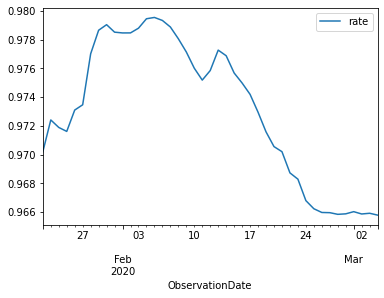

In [ ]:
#Graficando las tasas
sr.plot()

<AxesSubplot:xlabel='ObservationDate'>

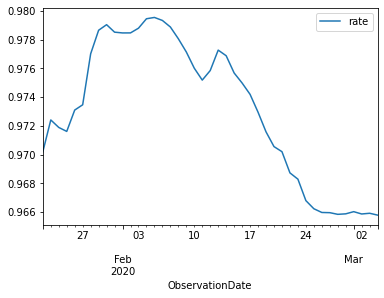

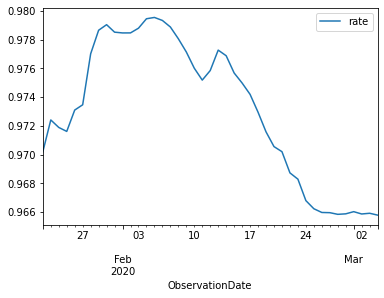

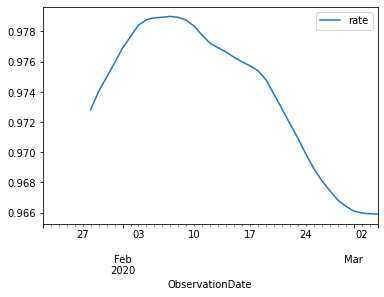

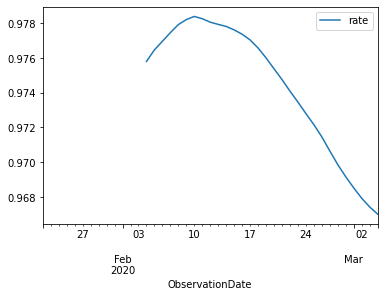

In [ ]:
sr.plot()
sr.rolling(window=1).mean().plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

> Recuerda que también puedes aplicar tus propias funciones con lambdas.

## Visualización y graficación de datos

Cuando graficas, los datos se entienden mejor. Es aquí cuando te puedes hacer preguntas y responderlas mediante datos.

Ahora, por ejemplo, queremos saber el país que más ocurrencias tiene. Y vamos a analizar la data de este país. (Spoiler: en este dataset es China, pero puedes analizar los datos actuales).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/work/downloadedData/covid_19_data.csv')
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered'
]]
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df_time = df.groupby('ObservationDate').sum()

In [ ]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)


Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [ ]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [ ]:
df_time = df.groupby(['Country/Region', pd.Grouper(key='ObservationDate', freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [ ]:
df_china = df_time.loc['Mainland China', :]
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


Text(0, 0.5, 'People')

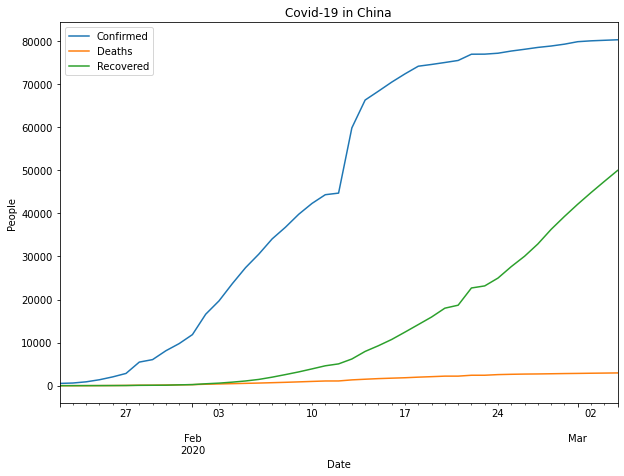

In [ ]:
#Ahora vamos a hacer un gráfico de China
df_china.plot(figsize=(10, 7))
plt.title('Covid-19 in China')
plt.xlabel('Date')
plt.ylabel('People')

Ahora hagamos un resample de China mensual para hacer un gráfico de barras.

In [ ]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


<AxesSubplot:xlabel='ObservationDate'>

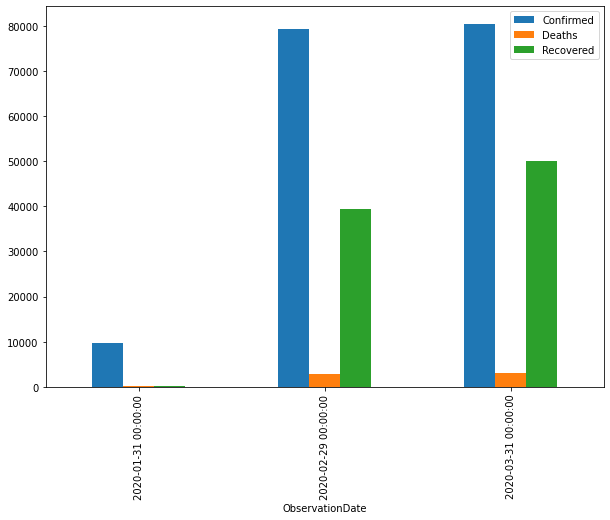

In [ ]:
df_monthly.plot(kind='bar', figsize=(10, 7))

<AxesSubplot:xlabel='ObservationDate'>

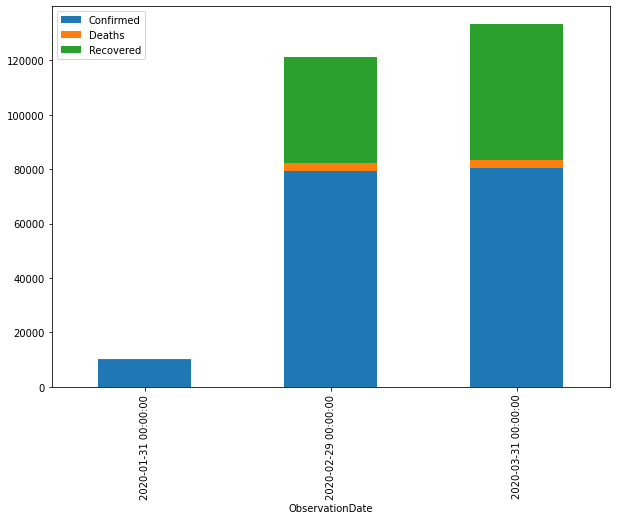

In [ ]:
#Si queremos que las barras se monten, ponemos stacked=True
df_monthly.plot(kind='bar', figsize=(10, 7), stacked=True)

Agreguemos unanueva columna para los que están en tratamiento y así hacer un gráfico _pie_.

In [ ]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


Sabemos que `Deaths + Recovered + Traitment = Confirmed`. Entonces:

array([<AxesSubplot:ylabel='2020-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>,
       <AxesSubplot:ylabel='2020-03-31 00:00:00'>], dtype=object)

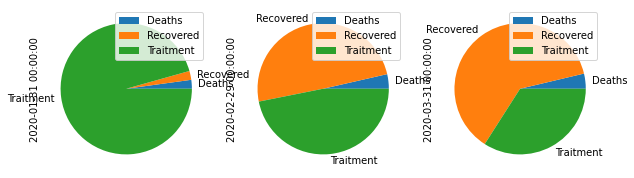

In [ ]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize=(10, 7), kind='pie', subplots=True)

<AxesSubplot:ylabel='Frequency'>

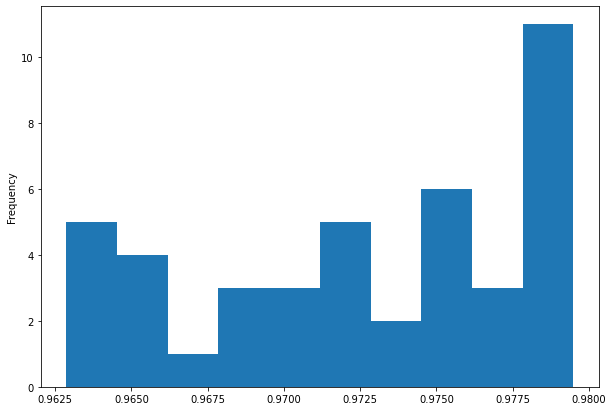

In [ ]:
#Un histograma
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']
df_china['rate'].plot(figsize = (10,7), bins = 10, kind='hist')

#df_china['rate'].hist(figsize = (10,7), bins = 10)  esta línea da lo mismo

Entonces, para escoger un gráfico, básicamente debes modificar el argumento `kind`. Puedes leer la documendación de [Pandas Plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) para que tus gráficos queden como tú desees. Y recuerda que también puedes combinar funcionalidades de Matplotlib.

# Contenido extra

## Iniciando una rutina típica de manejo de datos

Vamos a ver cómo es una rutina típica de análisis de datos. Cuando tienes tus datos, por lo general, vienen 'sucios', por lo que debes hacer data cleaning, data processing y consolidar esto en una base de datos para extraer *insights*. Para los *insights* te recomiendo usar Data Visualization.

### Links a la data
Temperature (°C)
https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalLandTemperaturesByCountry.csv

Topic
https://data.worldbank.org/topic/climate-change

CO2 (kt)
https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

Forest (km2)
https://data.worldbank.org/indicator/AG.LND.FRST.K2

Agricultura (km2)
https://data.worldbank.org/indicator/AG.LND.AGRI.K2

Population (7mM)
https://data.worldbank.org/indicator/SP.POP.TOTL

Electric power consumption (kWh per capita)
https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_temp = pd.read_csv('/work/downloadedData/GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
df_temp['Country'].unique().size

243

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
#Creamos una columna de 'year' con datos tipo fecha 
#Transformamos las fechas que vienen en tipo objeto
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  object        
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
 4   year                           577462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.0+ MB


Tenemos registros desde el año 1743. Pero esto solo es para algunos países. Para tratar de estandarizar, filtremos la data desde 1970, porque desde aquí se tiene registros para la mayoría de países.

In [ ]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')  #Este es el filtro que aplicaremos
df_temp = df_temp[idx]
df_temp  #Ahora el Data Frame tiene registros solo desde 1970

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


Ahora agrupamos el Data Frame por país y por año para ver su temperatura media y la mediana. Recuerda que debes aplicar funciones.

In [ ]:
df_t_avg = df_temp.groupby(
    ['Country', pd.Grouper(key='year', freq='1Y')]).agg({'AverageTemperature':[np.mean, np.median]}
    )

df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

Veamos la evolución de la temperatura en el tiempo de un país cualquiera.

<AxesSubplot:xlabel='year'>

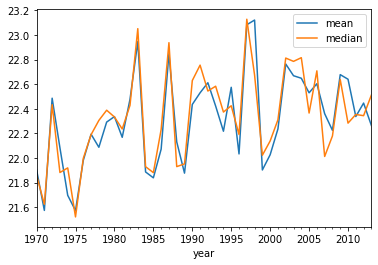

In [ ]:
df_t_avg.xs('Ecuador')['AverageTemperature'].plot()

Generalmente, es más conveniente trabajar con la mediana porque está menos sesgada. Entonces nos mantenemos con estos valores.

In [ ]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [ ]:
#Creamos una columna que contenga los años nada más y en formato integer
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

Ahora cambiemos el nombre de la columna `median` por `temperature`.

In [ ]:
df_t_med.rename(columns={'median':'temperature'}, inplace=True)  
#inplace=True lo guarda en la variable del Data Frame

df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


Hagamos un pivot de la tabla para ordenar la data. Los valores serán la temperatura, los índices serán las fechas (año) y las columnas serán los países.

In [ ]:
df_t_pivot = df_t_med.pivot(values='temperature', index='date', columns='Country')

df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua And Barbuda,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,NaN,27.2240,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,NaN,26.3810,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,NaN,26.7700,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,NaN,27.1725,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,NaN,26.5190,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,NaN,26.3340,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,NaN,26.8425,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,NaN,27.0085,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,NaN,27.0370,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


Ahora grafiquemos [boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51#:~:text=A%20boxplot%20is%20a%20standardized,%2C%20and%20%E2%80%9Cmaximum%E2%80%9D.&text=It%20can%20also%20tell%20you,how%20your%20data%20is%20skewed.) que son una forma de representar la distribución de los datos para cada columna, en este caso, país. Un boxplot muestra un resumen de 5 valores: la mínima, el primer cuartil, la media, el tercer cuartil y el máximo. Es parecido a una campana de Gauss. Con esto puedes identificar outliers también.

<AxesSubplot:>

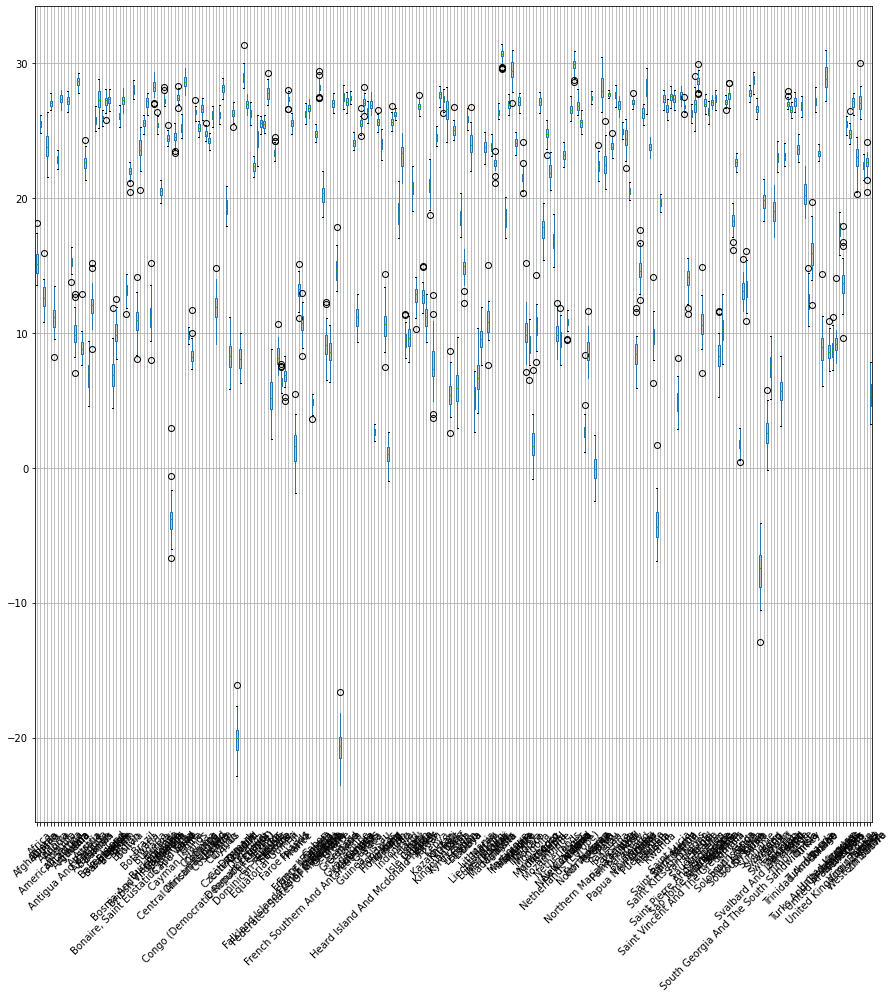

In [ ]:
df_t_pivot.boxplot(figsize=(15, 15), rot=45)

La visualización en el anterior gráfico no es muy clara. Para ver algo más prolijo, escojamos 5 países random.

<AxesSubplot:>

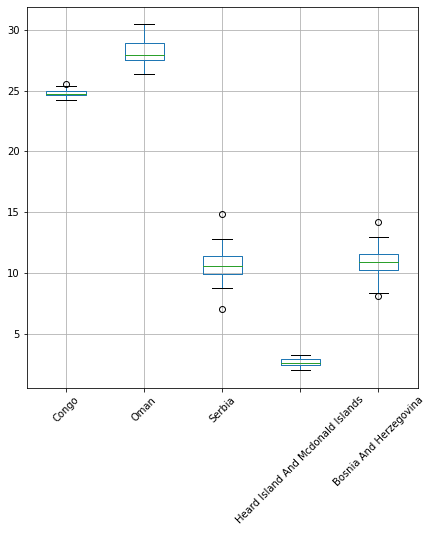

In [ ]:
df_t_pivot.T.sample(5).T.boxplot(figsize=(7, 7), rot=45)

## Procesamiento de datos: terminando de limpiar y preparar los datasets

Continuamos con el mismo proyecto y lo unimos con nuevos datasets. De esta forma podemos encontrar correlaciones.

> La etapa de preparar, unificar y limpiar los datasets ocupan entre el 60% y el 70% del tiempo en un trabajo de ciencia de datos.

Una ventaja de la data del World Bank es que tiene la misma estructura.

In [ ]:
df_agri = pd.read_csv('/work/downloadedData/API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header=2)
df_fore = pd.read_csv('/work/downloadedData/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header=2)
df_elec = pd.read_csv('/work/downloadedData/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header=2)
df_co2e = pd.read_csv('/work/downloadedData/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header=2)
df_popu = pd.read_csv('/work/downloadedData/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header=2)

In [ ]:
df_popu 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,1845300.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,NaN,NaN


Definamos las columnas que queremos que nuestros datasets tengan. Recuerda que previamente habíamos obtenido las temperaturas de los países desde 1970. Por lo tanto, ahora obtendremos data desde ese mismo año para todos los datasets.

In [ ]:
#Con esto definimos las columnas
range(1970, 2015)  #Creas el rango de años
map(str, range(1970, 2015))   #Transformas todos esos integers a string

cols = ['Country Name', 'Country Code'] + list(map(str, range(1970, 2015)))

cols[:6]

['Country Name', 'Country Code', '1970', '1971', '1972', '1973']

In [ ]:
#Con .melt() hacemos una especie de pivot
df_agri.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(columns={
    'variable': 'date',
    'Country Name': 'Country',
    'Country Code': 'Name',
    'value': 'agriculture'
})

,Country,Name,date,agriculture
0,Aruba,ABW,1970,20.0
1,Afghanistan,AFG,1970,380060.0
2,Angola,AGO,1970,574000.0
3,Albania,ALB,1970,12300.0
4,Andorra,AND,1970,260.0
...,...,...,...,...
11875,Kosovo,XKX,2014,NaN
11876,"Yemen, Rep.",YEM,2014,235460.0
11877,South Africa,ZAF,2014,968410.0
11878,Zambia,ZMB,2014,238360.0


Como tenemos que hacer el procedimiento anterior para cada dataset, lo más eficiente es usar una función.

In [ ]:
def fun_format(df, col=''):
    return df.loc[:, cols].melt(id_vars=['Country Name', 'Country Code']).rename(columns={
    'variable': 'date',
    'Country Name': 'Country',
    'Country Code': 'Name',
    'value': col
})

In [ ]:
#Aplicamos la función a todos los Data Frame
df_agri = fun_format(df_agri, col='agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col='co2')
df_popu = fun_format(df_popu, col = 'population')

In [ ]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [ ]:
#date de cada dataset es un object (string). Lo necesitamos en float
df_popu['date'] = df_popu['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)

Ahora procede unificar todos estos Data Frames en uno solo para hacer nuestro análisis de datos. Si te das cuenta, has limpiado, procesado y unificado.

In [ ]:
df_merge = pd.merge(
    df_t_med[['Country', 'temperature', 'date']], 
    df_popu, on=['Country', 'date'], 
    how='inner'
    )

In [ ]:
df_merge

,Country,temperature,date,Name,population
0,Afghanistan,16.1990,1970,AFG,11173642.0
1,Afghanistan,14.9340,1971,AFG,11475445.0
2,Afghanistan,13.8725,1972,AFG,11791215.0
3,Afghanistan,14.9130,1973,AFG,12108963.0
4,Afghanistan,13.6160,1974,AFG,12412950.0
...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,ZWE,12526968.0
7388,Zimbabwe,23.3040,2010,ZWE,12697723.0
7389,Zimbabwe,22.9420,2011,ZWE,12894316.0
7390,Zimbabwe,23.0455,2012,ZWE,13115131.0


In [ ]:
#Ahora unificamos el resto
df_merge = pd.merge(
    df_merge,
    df_co2e,
    on=['Country', 'Name', 'date'],
    how='inner'
)

df_merge = pd.merge(
    df_merge,
    df_elec,
    on=['Country', 'Name', 'date'],
    how='inner'
)

df_merge = pd.merge(
    df_merge,
    df_fore,
    on=['Country', 'Name', 'date'],
    how='inner'
)

df_merge = pd.merge(
    df_merge,
    df_agri,
    on=['Country', 'Name', 'date'],
    how='inner'
)

In [ ]:
df_merge

,Country,temperature,date,Name,population,co2,electricprod,forest,agriculture
0,Afghanistan,16.1990,1970,AFG,11173642.0,1672.152,NaN,NaN,380060.0
1,Afghanistan,14.9340,1971,AFG,11475445.0,1895.839,NaN,NaN,380360.0
2,Afghanistan,13.8725,1972,AFG,11791215.0,1532.806,NaN,NaN,380460.0
3,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,NaN,380480.0
4,Afghanistan,13.6160,1974,AFG,12412950.0,1917.841,NaN,NaN,380480.0
...,...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,159510.000000,163000.0
7388,Zimbabwe,23.3040,2010,ZWE,12697723.0,7777.707,606.644199,156240.000000,162000.0
7389,Zimbabwe,22.9420,2011,ZWE,12894316.0,9563.536,636.249337,153115.996094,164000.0
7390,Zimbabwe,23.0455,2012,ZWE,13115131.0,7792.375,608.762505,149992.001953,162000.0


Nuestro Data Frame unificado tiene valores nulos. Puedes decidir eliminarlos, rellenarlos con algún valor o interpolarlos. Primero veamos cuánta data nula tenemos para decidir qué hacer.

In [ ]:
df_merge.isnull().sum()

Country            0
temperature        0
date               0
Name               0
population        25
co2              849
electricprod    2694
forest          3408
agriculture      658
dtype: int64

Si te das cuenta, en `forest` tenemos más de la mitad de valores nulos y en `electricprod` es mucho también. Entonces, tú cono analista debes concluir qué es mejor para tu análisis. ¿Son estas columnas imprescindibles? ¿Cuánto afecta rellenar, interpolar o eliminar los datos nulos? ¿Cuán sesgados serán los análisis? 

Dado que los valores nulos son demasiados y, en este caso, sí me interesa mantener las columnas `forest` y `electricprod`, voy a eliminar las filas con valores nulos.

In [ ]:
df_climate = df_merge.dropna()
df_climate

,Country,temperature,date,Name,population,co2,electricprod,forest,agriculture
64,Albania,13.4490,1990,ALB,3286542.0,5515.168,552.252185,7887.999878,11210.0
65,Albania,11.5885,1991,ALB,3266790.0,4286.723,418.453589,7868.499756,11270.0
66,Albania,13.5850,1992,ALB,3247039.0,2515.562,453.644074,7849.000244,11270.0
67,Albania,13.6500,1993,ALB,3227287.0,2335.879,536.363825,7829.500122,11260.0
68,Albania,13.2390,1994,ALB,3207536.0,1925.175,596.407959,7810.000000,11260.0
...,...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,159510.000000,163000.0
7388,Zimbabwe,23.3040,2010,ZWE,12697723.0,7777.707,606.644199,156240.000000,162000.0
7389,Zimbabwe,22.9420,2011,ZWE,12894316.0,9563.536,636.249337,153115.996094,164000.0
7390,Zimbabwe,23.0455,2012,ZWE,13115131.0,7792.375,608.762505,149992.001953,162000.0


In [ ]:
#Ahora nuestra muestra se redujo a esta cantidad de datos
df_climate.count()

Country         2735
temperature     2735
date            2735
Name            2735
population      2735
co2             2735
electricprod    2735
forest          2735
agriculture     2735
dtype: int64

## Análisis de datos

Ahora que ya tenemos un dataset limpio y unificado solo queda extraer *insights* de la data. Para esto la correlación es muy útil. Pero recuerda que una correlación no significa causalidad.

Además, el primer paso para extraer insights es hacerse preguntas, por ejemplo, ¿cuáles son los 10 países que más CO2 emiten?

In [ ]:
#Esta línea le da formato a la notación numérica
pd.set_option('display.float_format', '{:,.1f}'.format)  

In [ ]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [ ]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(11).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico', 'South Africa'],
      dtype='object', name='Country')

In [ ]:
df_max_co2 = df_climate[df_climate['Country'].isin(['United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico', 'South Africa'])]

df_max_co2

,Country,temperature,date,Name,population,co2,electricprod,forest,agriculture
1296,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","3,482,730.0","677,680.0"
1297,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","3,482,259.1","677,530.0"
1298,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","3,481,788.1","678,140.0"
1299,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","3,481,316.9","678,740.0"
1300,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","3,480,845.9","679,340.0"
...,...,...,...,...,...,...,...,...,...
7167,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","3,079,274.1","4,099,606.9"
7168,United States,10.2,2010,USA,"309,326,085.0","5,395,532.1","13,394.9","3,087,200.0","4,084,261.9"
7169,United States,9.5,2011,USA,"311,580,009.0","5,289,680.5","13,246.0","3,089,950.0","4,046,693.1"
7170,United States,9.9,2012,USA,"313,874,218.0","5,119,436.4","12,964.3","3,092,700.0","4,087,065.0"


<AxesSubplot:xlabel='Country'>

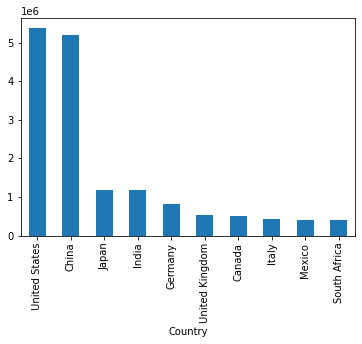

In [ ]:
#Un gráfico de barras de los países que más CO2 producen.
df_max_co2.groupby('Country')['co2'].mean().sort_values(ascending=False).plot(kind='bar')

Ahora hagamos una gráfica de correlación. 

<AxesSubplot:xlabel='population', ylabel='co2'>

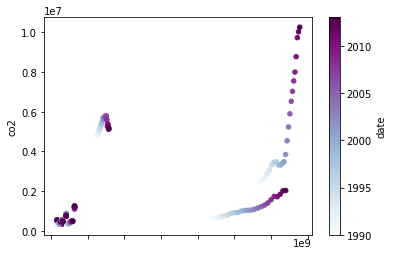

In [ ]:
df_max_co2.set_index('Country').plot.scatter(x='population', y='co2', c='date', colormap='BuPu')

Con esto vemos cómo se correlacionan las emisiones de CO2 con la fecha y la población de los 10 PRIMEROS PAÍSES QUE EMITEN CO2.

También podemos visualizar correlaciones mediante un mapa de calor. Lo haremos tomando en cuenta cada país en particular.

In [ ]:
df_climate.corr()

,temperature,date,population,co2,electricprod,forest,agriculture
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.0,0.4,0.6
co2,-0.2,0.0,0.6,1.0,0.2,0.7,0.8
electricprod,-0.4,0.1,-0.0,0.2,1.0,0.2,0.1
forest,-0.1,-0.0,0.4,0.7,0.2,1.0,0.7
agriculture,-0.1,-0.0,0.6,0.8,0.1,0.7,1.0


In [ ]:
import seaborn as sns

<AxesSubplot:>

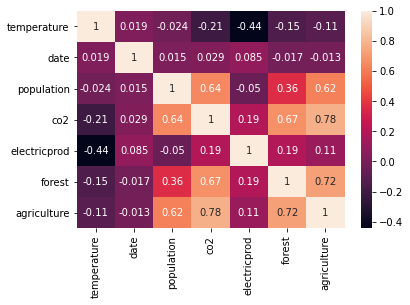

In [ ]:
sns.heatmap(df_climate.corr(), annot=True)

La gráfica anterior toma en cuenta los valores individuales por cada país y por eso no podríamos considerar esto como una correlación a nivel del mundo. Por ejemplo, las temeperaturas en Canadá y Brasil son muy diferentes. Entonces, para hacar una correlación mundial podemos sacar la media de temeperatura en el mundo.

In [ ]:
df_median = df_climate.groupby('date').median()
df_median

,temperature,population,co2,electricprod,forest,agriculture
date,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","54,005.0","90,195.0"
1991,22.4,"10,346,663.5","27,343.0","1,072.5","60,307.5","91,870.0"
1992,19.9,"9,188,305.5","26,420.7","1,451.8","45,621.0","89,700.0"
1993,20.6,"9,951,683.5","28,267.1","1,520.3","44,579.0","89,890.0"
1994,20.7,"9,991,525.0","29,640.4","1,576.8","42,572.0","89,150.0"
1995,20.1,"10,026,176.0","29,090.3","1,578.3","41,640.0","81,080.0"
1996,20.2,"10,063,945.0","30,670.8","1,687.1","41,270.0","79,870.0"
1997,20.4,"10,108,977.0","30,623.1","1,762.4","41,270.0","80,120.0"
1998,21.5,"10,069,000.0","31,675.5","1,807.3","40,834.0","80,550.0"


In [ ]:
df_median.corr()

,temperature,population,co2,electricprod,forest,agriculture
temperature,1.0,0.4,0.0,-0.3,0.5,0.2
population,0.4,1.0,0.7,0.6,-0.2,-0.6
co2,0.0,0.7,1.0,0.9,-0.6,-0.8
electricprod,-0.3,0.6,0.9,1.0,-0.8,-0.9
forest,0.5,-0.2,-0.6,-0.8,1.0,0.8
agriculture,0.2,-0.6,-0.8,-0.9,0.8,1.0


<AxesSubplot:>

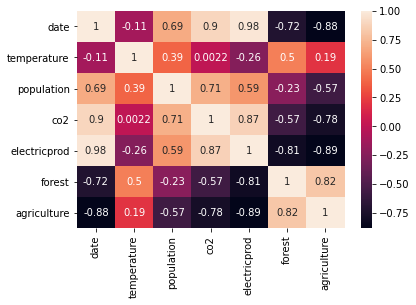

In [ ]:
sns.heatmap(df_median.reset_index().corr(), annot=True)

In [ ]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='date', ylabel='date'>,
        <AxesSubplot:xlabel='temperature', ylabel='date'>,
        <AxesSubplot:xlabel='population', ylabel='date'>,
        <AxesSubplot:xlabel='co2', ylabel='date'>,
        <AxesSubplot:xlabel='electricprod', ylabel='date'>,
        <AxesSubplot:xlabel='forest', ylabel='date'>,
        <AxesSubplot:xlabel='agriculture', ylabel='date'>],
       [<AxesSubplot:xlabel='date', ylabel='temperature'>,
        <AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='population', ylabel='temperature'>,
        <AxesSubplot:xlabel='co2', ylabel='temperature'>,
        <AxesSubplot:xlabel='electricprod', ylabel='temperature'>,
        <AxesSubplot:xlabel='forest', ylabel='temperature'>,
        <AxesSubplot:xlabel='agriculture', ylabel='temperature'>],
       [<AxesSubplot:xlabel='date', ylabel='population'>,
        <AxesSubplot:xlabel='temperature', ylabel='population'>,
        <AxesSubplot:xlabel='population'

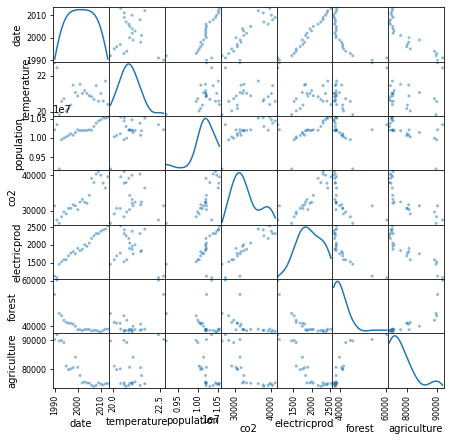

In [ ]:
scatter_matrix(df_median.reset_index(),diagonal='kde', figsize = (7,7))

Ahora hagamos coordenadas paralelas.

In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
df_samerica = df_climate[
df_climate['Country'].isin(['Colombia',
     'Argentina',
     'Bolivia',
     'Mexico',
     'Peru',
     'Chile'])
][['Country',
 'temperature',
 'co2',
 'agriculture',
 'forest']]

<AxesSubplot:>

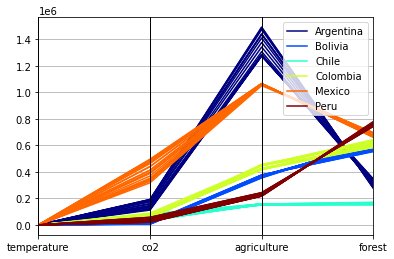

In [ ]:
parallel_coordinates(df_samerica, 'Country', colormap = 'jet')

In [ ]:
#Para Ecuador
df_climate_ecu = df_climate[df_climate['Country'].isin(['Ecuador'])]
df_climate_ecu = df_climate_ecu.groupby('date').median()
df_climate_ecu

,temperature,population,co2,electricprod,forest,agriculture
date,,,,,,
1990,22.6,"10,230,934.0","16,827.9",480.7,"146,308.5","78,460.0"
1991,22.8,"10,472,475.0","16,497.8",509.0,"145,406.5","79,140.0"
1992,22.5,"10,716,129.0","22,280.7",522.5,"144,504.6","79,530.0"
1993,22.6,"10,961,466.0","24,205.9",517.4,"143,602.7","79,750.0"
1994,22.4,"11,208,001.0","13,652.2",549.9,"142,700.7","81,290.0"
1995,22.4,"11,455,204.0","22,841.7",552.2,"141,798.8","81,080.0"
1996,22.2,"11,703,174.0","24,191.2",612.1,"140,896.9","79,870.0"
1997,23.1,"11,951,452.0","18,360.7",654.7,"139,995.0","80,120.0"
1998,22.7,"12,198,449.0","22,460.4",686.6,"139,093.0","80,270.0"


In [ ]:
df_climate_ecu.reset_index().corr()

,date,temperature,population,co2,electricprod,forest,agriculture
date,1.0,-0.2,1.0,0.9,1.0,-1.0,-0.8
temperature,-0.2,1.0,-0.2,-0.2,-0.2,0.2,-0.0
population,1.0,-0.2,1.0,0.9,0.9,-1.0,-0.8
co2,0.9,-0.2,0.9,1.0,0.9,-0.9,-0.8
electricprod,1.0,-0.2,0.9,0.9,1.0,-0.9,-0.7
forest,-1.0,0.2,-1.0,-0.9,-0.9,1.0,0.8
agriculture,-0.8,-0.0,-0.8,-0.8,-0.7,0.8,1.0


<AxesSubplot:>

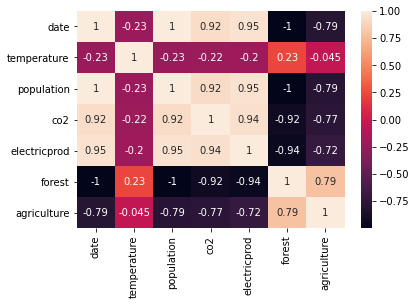

In [ ]:
sns.heatmap(df_climate_ecu.reset_index().corr(), annot=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ddb7a3f0-b1f2-4adb-b5cf-68f60eca6f92' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>